<a href="https://colab.research.google.com/github/Neerajmn28/Data-Science-Projects/blob/main/Time%20Series%20Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
!pip install prophet

In [142]:
!pip install pmdarima

###PROBLEM STATEMENT : Forecast MICROSOFT Stock Prices for the next 30 days.

### Import the libraries

In [143]:
import pandas as pd
import numpy
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.stattools as sts
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.ar_model import AutoReg
from random import random
from scipy.stats import chi2
from statsmodels.graphics.tsaplots import plot_acf

import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

Yahoo Finance is one of the most popular websites for collecting stock price data, Yahoo Finance provides users with a wealth of financial information, market news, and analytical tools. Investors and traders rely on its real-time stock quotes, interactive charts, and customizable watchlists to monitor market movements and track the performance of their investments.



In [144]:
df = 'MSFT'

# Get the data on this
df = yf.Ticker(df)

# Get the historical prices or this ticker
data = df.history(period = '10y')

# Print the data
data.reset_index(inplace = True)
print(data)

                          Date        Open        High         Low  \
0    2014-04-30 00:00:00-04:00   34.210911   34.295590   34.016143   
1    2014-05-01 00:00:00-04:00   34.075427   34.177043   33.829853   
2    2014-05-02 00:00:00-04:00   34.134701   34.160105   33.584277   
3    2014-05-05 00:00:00-04:00   33.465727   33.567343   33.279429   
4    2014-05-06 00:00:00-04:00   33.270963   33.321770   32.983050   
...                        ...         ...         ...         ...   
2513 2024-04-24 00:00:00-04:00  409.559998  412.470001  406.779999   
2514 2024-04-25 00:00:00-04:00  394.029999  399.890015  388.029999   
2515 2024-04-26 00:00:00-04:00  412.170013  413.000000  405.760010   
2516 2024-04-29 00:00:00-04:00  405.250000  406.320007  399.190002   
2517 2024-04-30 00:00:00-04:00  401.489990  402.150299  396.304993   

           Close    Volume  Dividends  Stock Splits  
0      34.210911  35458700        0.0           0.0  
1      33.872192  28787400        0.0           0.0

In [145]:
# Convert Date column to datetime object
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].dt.date
print(data.head())

         Date       Open       High        Low      Close    Volume  \
0  2014-04-30  34.210911  34.295590  34.016143  34.210911  35458700   
1  2014-05-01  34.075427  34.177043  33.829853  33.872192  28787400   
2  2014-05-02  34.134701  34.160105  33.584277  33.609680  43416600   
3  2014-05-05  33.465727  33.567343  33.279429  33.389515  22460900   
4  2014-05-06  33.270963  33.321770  32.983050  33.076199  27112400   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


# EDA (Exploratory data analysis)

In [146]:
data.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [147]:
data.duplicated().sum()

0

In [148]:
data.describe()

Open         High          Low        Close        Volume  \
count  2518.000000  2518.000000  2518.000000  2518.000000  2.518000e+03   
mean    156.696344   158.223171   155.107167   156.740727  2.961378e+07   
std     110.406964   111.451897   109.282327   110.412643  1.373100e+07   
min      33.211695    33.321770    32.610461    33.076199  7.425600e+06   
25%      53.499859    54.041570    53.019145    53.470867  2.141218e+07   
50%     118.509779   119.767085   117.842599   119.182861  2.645800e+07   
75%     249.849462   252.386236   246.675257   249.315315  3.362142e+07   
max     429.829987   430.820007   427.160004   429.369995  2.025224e+08   

         Dividends  Stock Splits  
count  2518.000000        2518.0  
mean      0.007665           0.0  
std       0.062649           0.0  
min       0.000000           0.0  
25%       0.000000           0.0  
50%       0.000000           0.0  
75%       0.000000           0.0  
max       0.750000           0.0

In [149]:
data.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [150]:
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.strftime('%b')
data['Year'] =data['Date'].dt.strftime('%Y')
data.head()

Date       Open       High        Low      Close    Volume  Dividends  \
0 2014-04-30  34.210911  34.295590  34.016143  34.210911  35458700        0.0   
1 2014-05-01  34.075427  34.177043  33.829853  33.872192  28787400        0.0   
2 2014-05-02  34.134701  34.160105  33.584277  33.609680  43416600        0.0   
3 2014-05-05  33.465727  33.567343  33.279429  33.389515  22460900        0.0   
4 2014-05-06  33.270963  33.321770  32.983050  33.076199  27112400        0.0   

   Stock Splits Month  Year  
0           0.0   Apr  2014  
1           0.0   May  2014  
2           0.0   May  2014  
3           0.0   May  2014  
4           0.0   May  2014

# Data Visualization

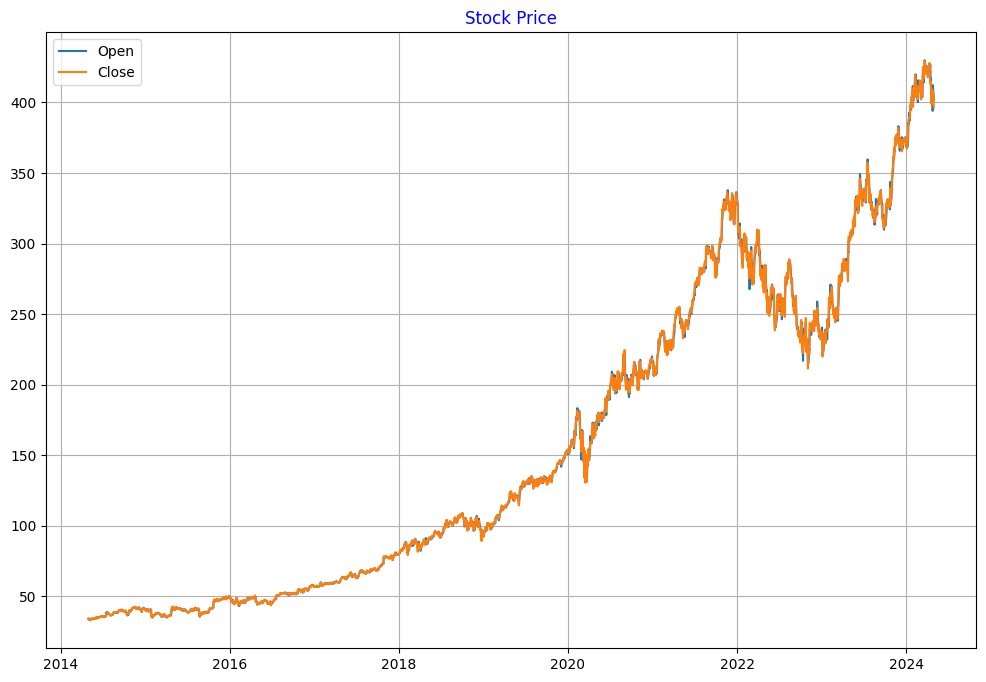

In [151]:
plt.figure(figsize=(12,8))
plt.plot(data['Date'],data['Open'],label='Open')
plt.plot(data['Date'],data['Close'],label='Close')
plt.title('Stock Price',color='b')
plt.grid()
plt.legend(loc='best')

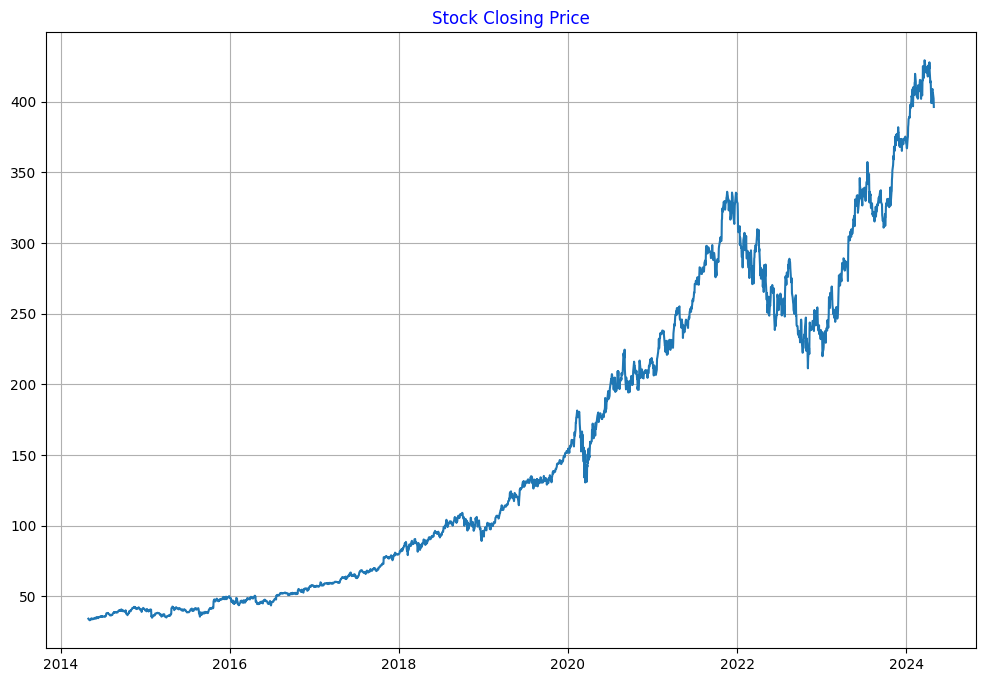

In [152]:
plt.figure(figsize=(12,8))
plt.plot(data['Date'],data['Close'])
plt.title('Stock Closing Price',color = 'b')
plt.grid()

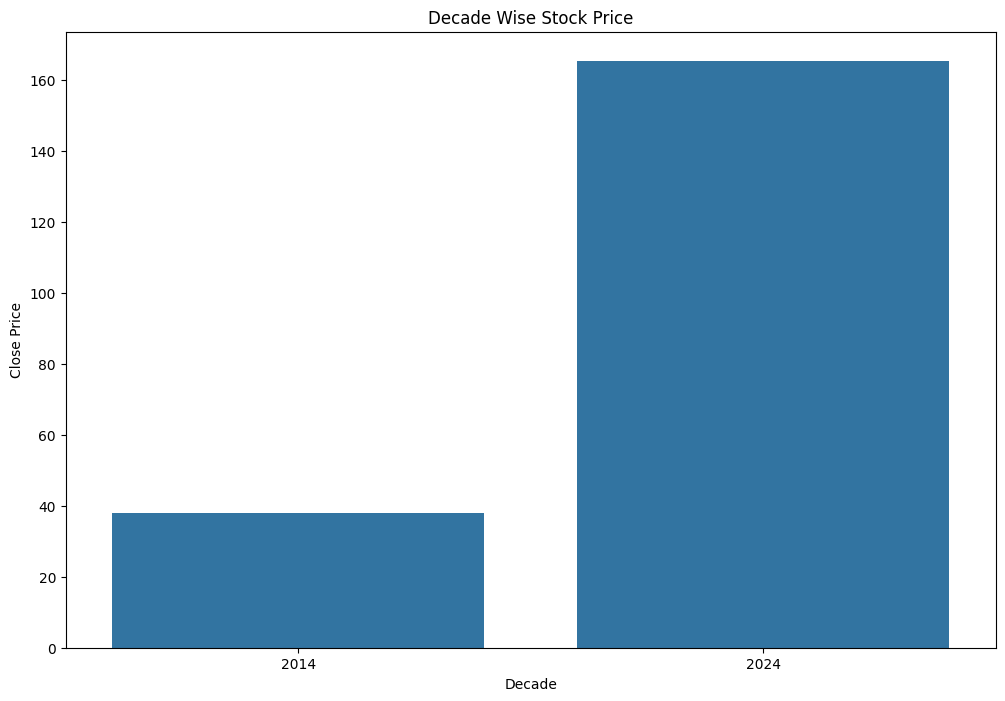

In [153]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date',inplace = True)

# Resample 'Close' prices by decade and calculate the mean
decade_wise = data['Close'].resample('10y').mean()
# Plot the stock prices decade-wise
plt.figure(figsize=(12,8))
plt.title('Decade Wise Stock Price')
sns.barplot(x = decade_wise.index.year, y = decade_wise.values)
plt.xlabel('Decade')
plt.ylabel('Close Price')
plt.show()

<Axes: title={'center': 'Year Wise Stock Price'}, xlabel='Date'>

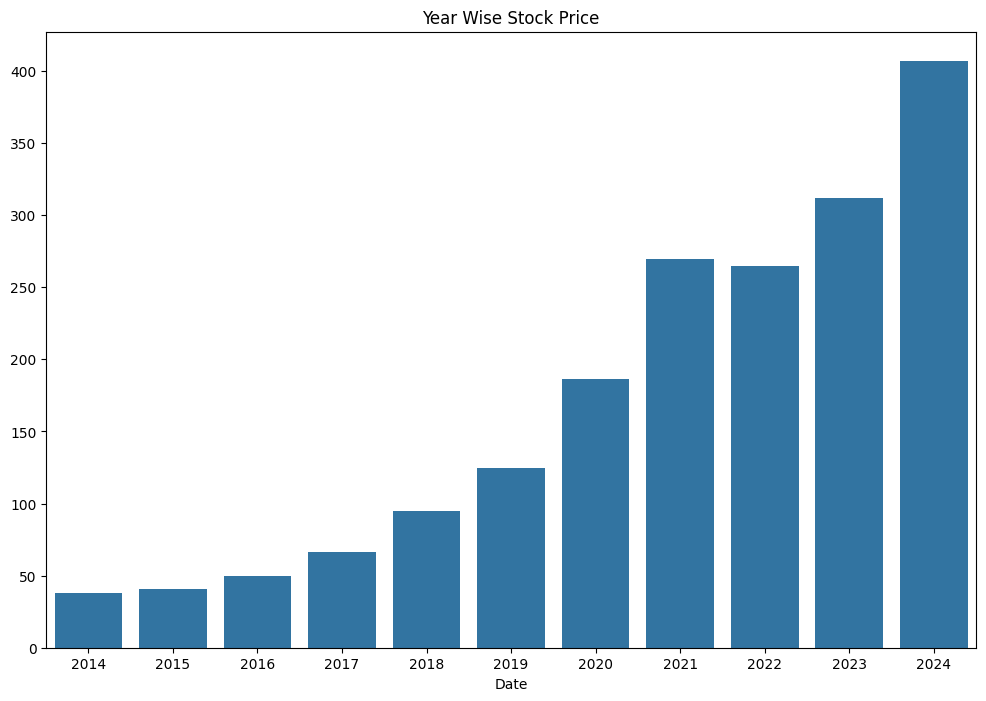

In [154]:
# Resample 'Close' prices by year wise
year_wise = data['Close'].resample('Y').mean()
# Plot the stock prices year-wise
plt.figure(figsize=(12,8))
plt.title('Year Wise Stock Price')
sns.barplot(x = year_wise.index.year, y = year_wise.values)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, '2014'),
  Text(1, 0, '2015'),
  Text(2, 0, '2016'),
  Text(3, 0, '2017'),
  Text(4, 0, '2018'),
  Text(5, 0, '2019'),
  Text(6, 0, '2020'),
  Text(7, 0, '2021'),
  Text(8, 0, '2022'),
  Text(9, 0, '2023'),
  Text(10, 0, '2024')])

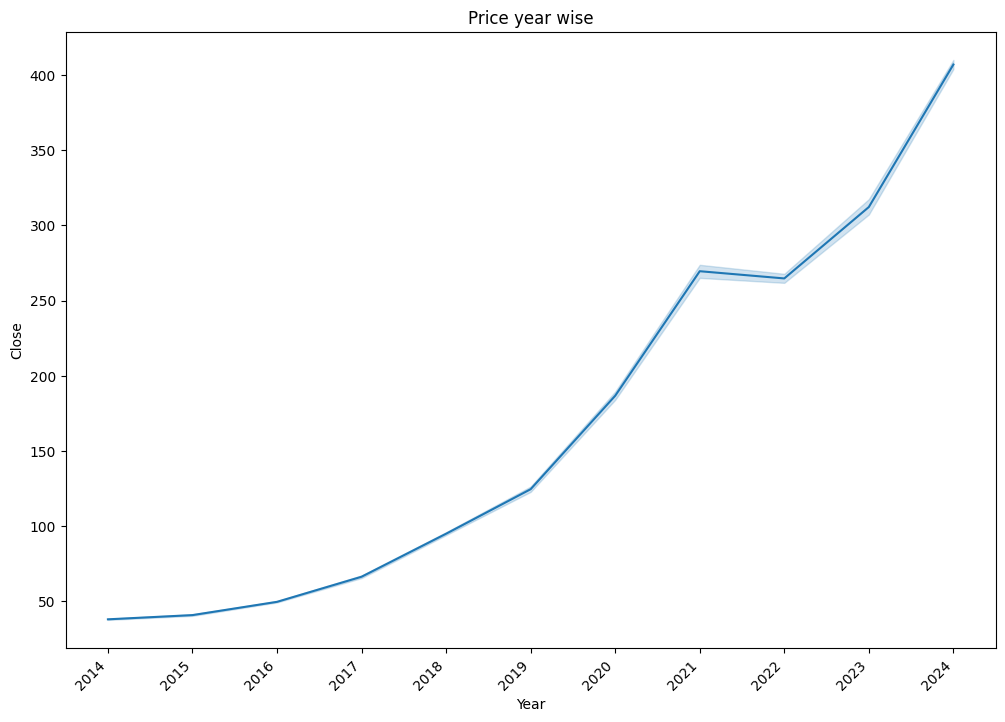

In [155]:
plt.figure(figsize=(12,8))
plt.title('Price year wise')
sns.lineplot(x = data['Year'], y = data['Close'])
plt.xticks(rotation = 45, ha = 'right')

<Axes: xlabel='Month', ylabel='Year'>

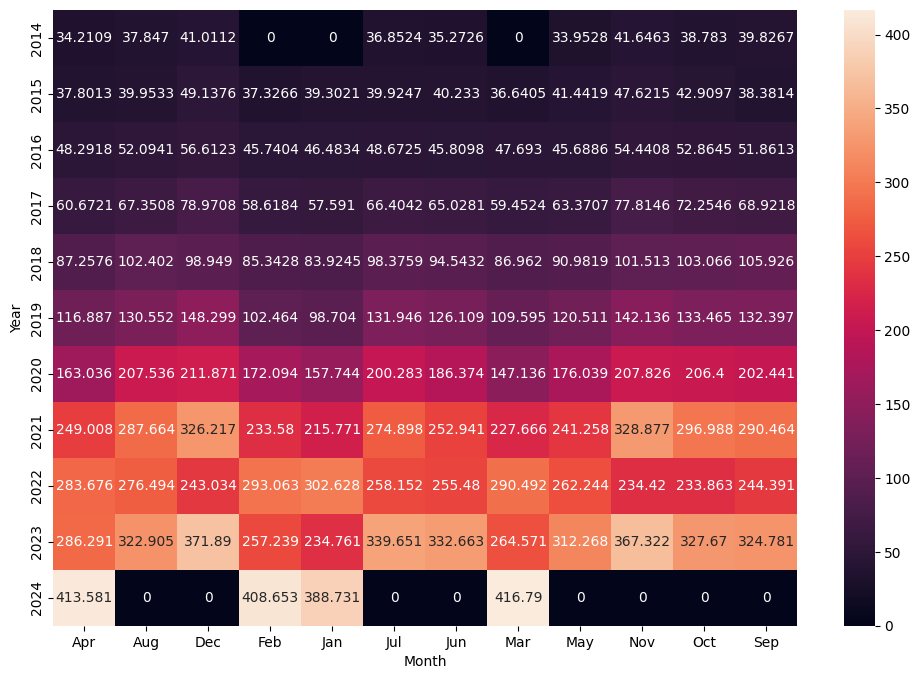

In [156]:
plt.figure(figsize=(12,8))
heatmap = pd.pivot_table(data = data,values = 'Close', index = 'Year', columns = 'Month',fill_value=0)
sns.heatmap(heatmap,annot = True, fmt = 'g')

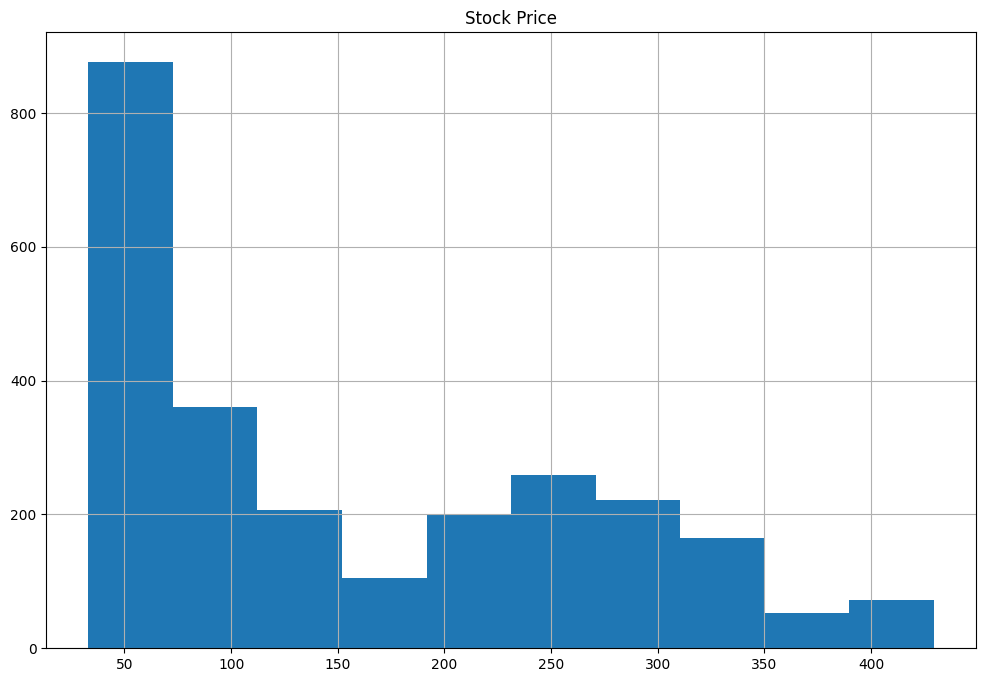

In [157]:
data.Close.hist(figsize=(12,8))
plt.title('Stock Price')
plt.show()

Lag Plot

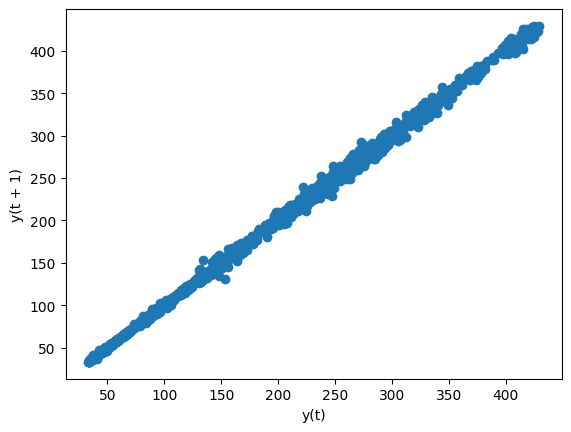

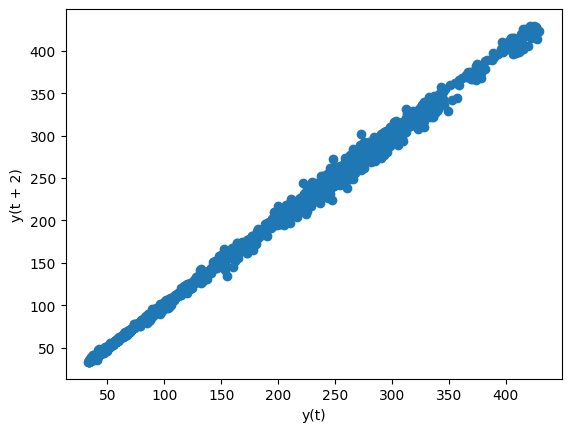

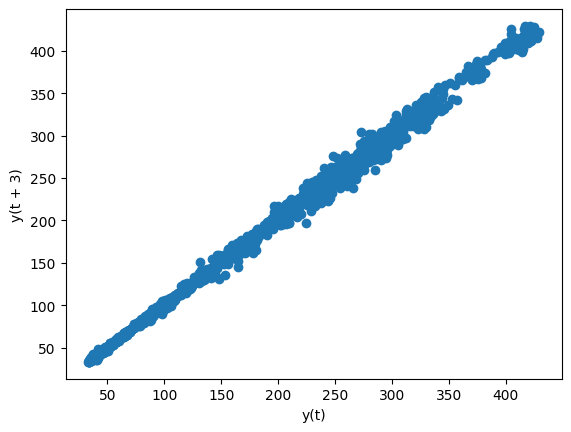

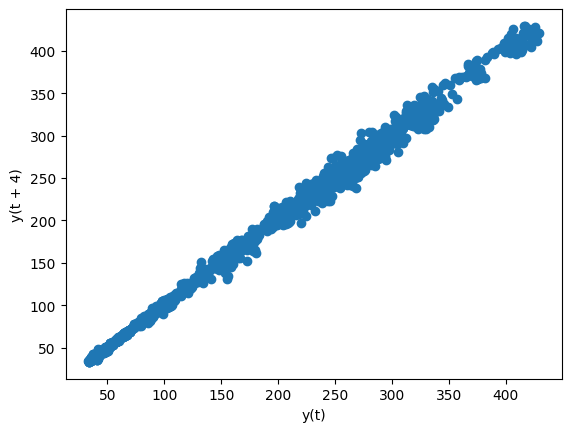

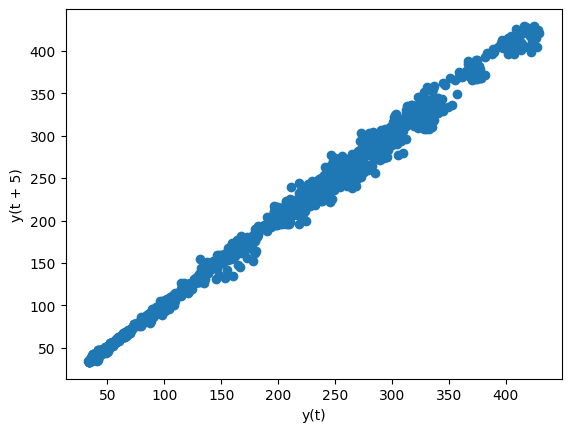

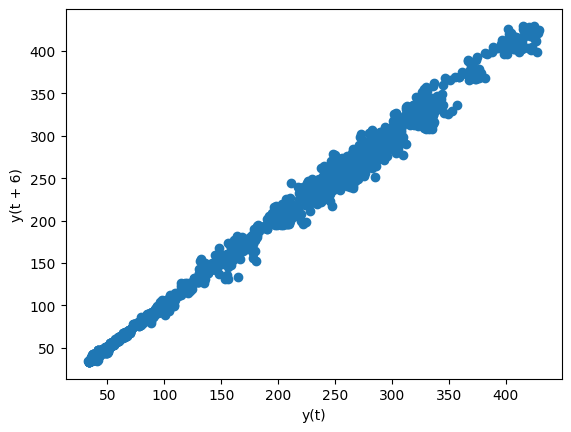

In [158]:
for item in [1,2,3,4,5,6]:
  lag_plot(data.Close,lag = item)
  plt.show()

MOVING AVERAGE PLOT
*  Moving average helps in identifying trends within the time series data by smoothing out short-term fluctuations or noise. By plotting the moving average alongside the original data, you can visually assess whether the data is exhibiting an upward, downward, or stable trend over time.
*  Moving Average helps in identifying outliers or anomalies in the data. Sudden spikes or dips in the original data series may be smoothed out in the moving average plot, making it easier to spot unusual observations that deviate significantly from the expected pattern.

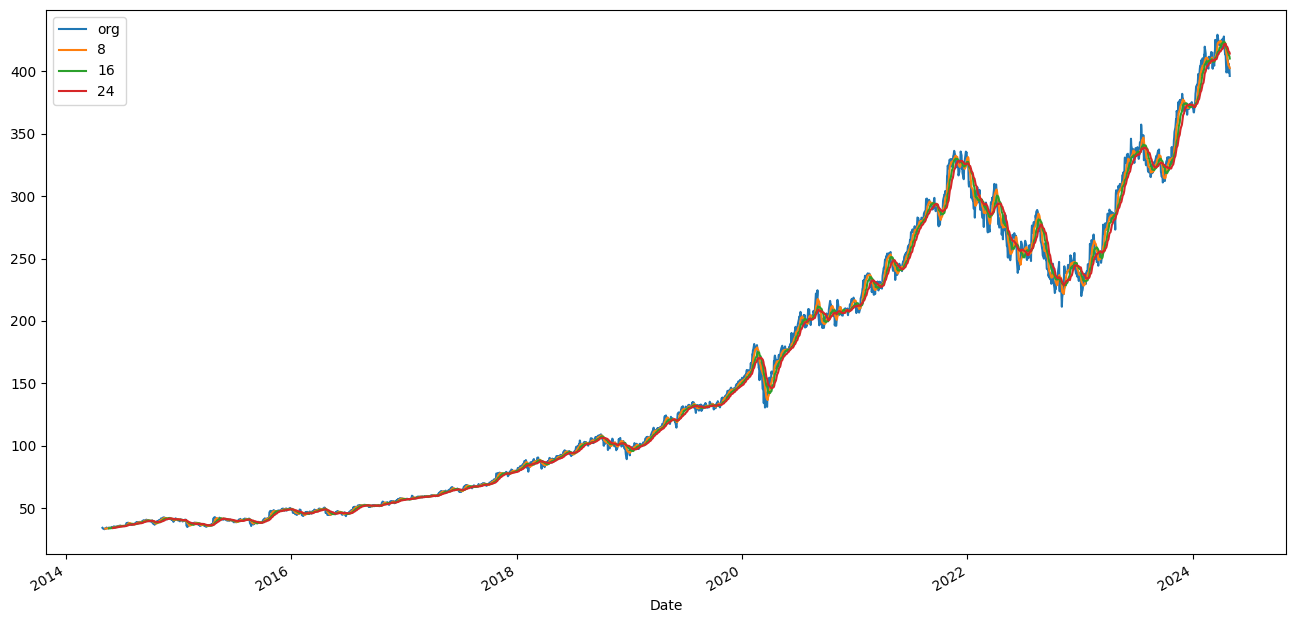

In [159]:
plt.figure(figsize=(16,8))
data.Close.plot(label = 'org')
for item in range(8, 25, 8):
  data['Close'].rolling(item).mean().plot(label = str(item))
plt.legend(loc = 'best')
plt.show()

 Time Series Decomposition Plot

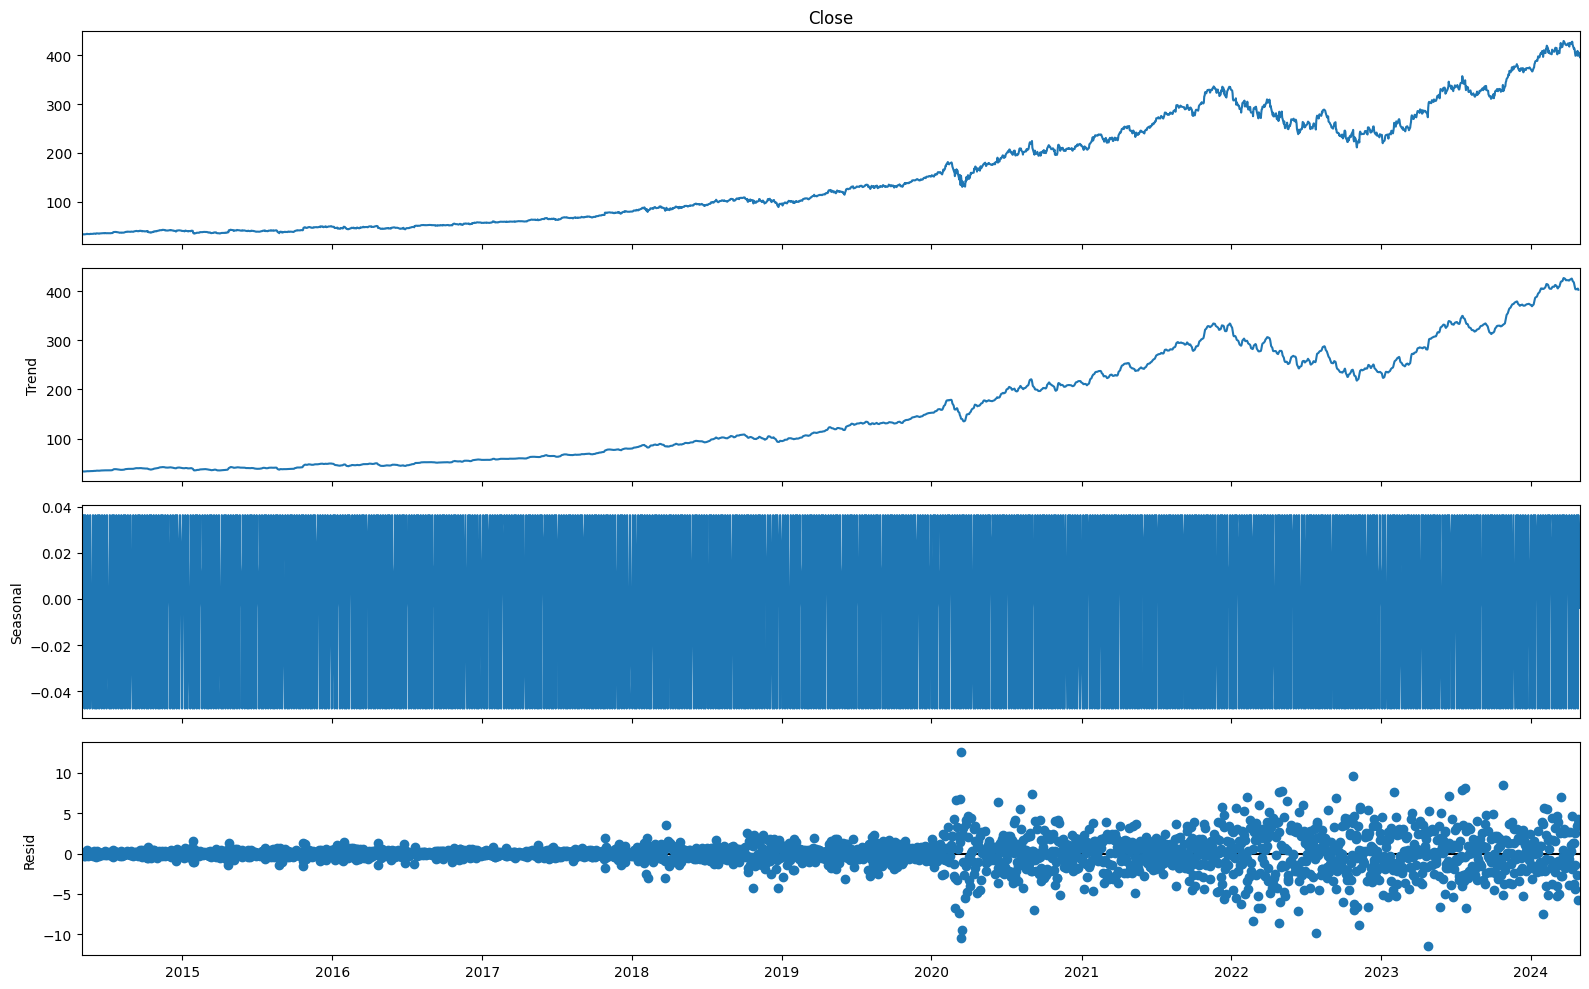

In [160]:
decomposition_plot = seasonal_decompose(data.Close,period = 4)
with plt.rc_context():
  plt.rc('figure', figsize = (16,10))
  decomposition_plot.plot()
  plt.show()

# Train test split

In [161]:
data_model = data[['Close']]
data_model.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2014-04-30 to 2024-04-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2518 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB


In [162]:
train_size = data_model.iloc[0:2400]
test_size = data_model.iloc[2400:2517]

<Axes: xlabel='Date'>

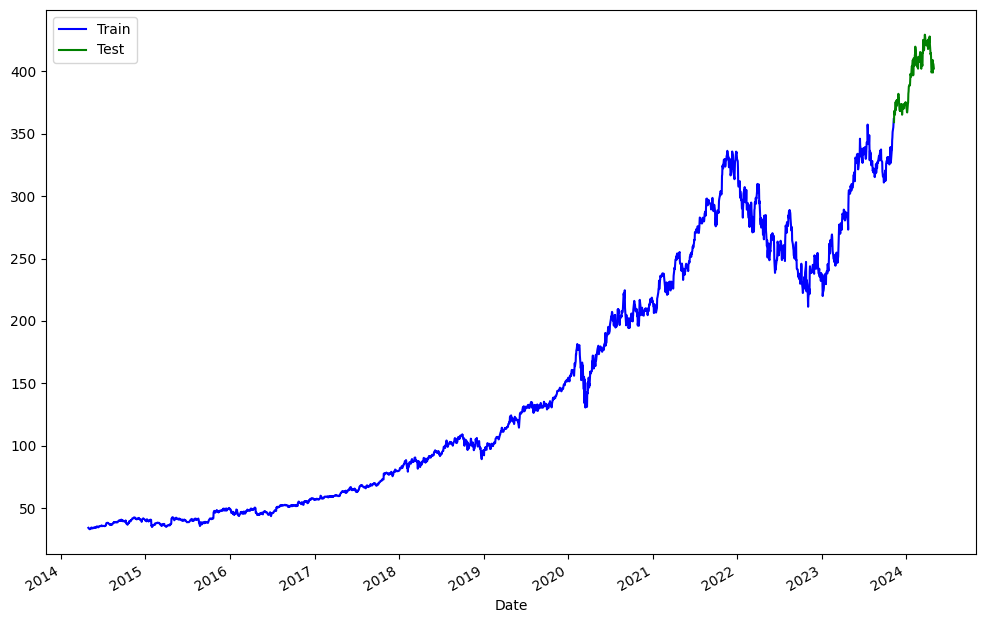

In [163]:
train_size['Close'].plot(legend = True, label = 'Train',color = 'blue')
test_size['Close'].plot(legend = True, label = 'Test',figsize=(12,8), color = 'green')

Percentage change

In [164]:
data_model['Perct_change'] = data_model['Close'].pct_change(periods = 1)*100
data_model.head()

Close  Perct_change
Date                               
2014-04-30  34.210911           NaN
2014-05-01  33.872192     -0.990089
2014-05-02  33.609680     -0.775008
2014-05-05  33.389515     -0.655065
2014-05-06  33.076199     -0.938367

# Exponential Models

### Simple exponential

In [165]:
model_ses = SimpleExpSmoothing(train_size['Close'])
fitted_ses = model_ses.fit(smoothing_level = 0.15, optimized = True)
pred_train_ses = fitted_ses.fittedvalues.shift(-1)

In [166]:
model_ses = SimpleExpSmoothing(test_size['Close'])
fitted_ses = model_ses.fit(smoothing_level = 0.15, optimized = True)
pred_ses = fitted_ses.fittedvalues.shift(-1)
pred_ses.fillna(method = 'ffill',inplace = True)
pred_ses.head()

Date
2023-11-09    359.294983
2023-11-10    360.636775
2023-11-13    361.330530
2023-11-14    362.456639
2023-11-15    363.436294
dtype: float64

In [167]:
data_model['SES'] = pred_ses
data_model.tail()

Close  Perct_change         SES
Date                                            
2024-04-24  409.059998      0.365579  411.268729
2024-04-25  399.040009     -2.449516  409.434421
2024-04-26  406.320007      1.824378  408.967259
2024-04-29  402.250000     -1.001675  408.967259
2024-04-30  396.315002     -1.475450         NaN

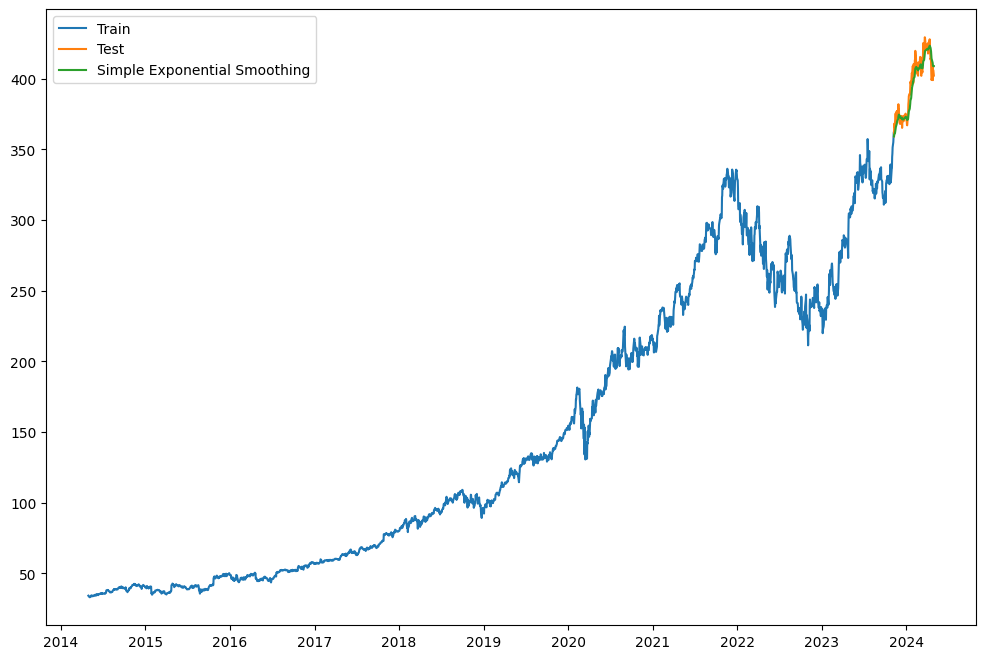

In [168]:
plt.figure(figsize=(12,8))
plt.plot(train_size, label = 'Train')
plt.plot(test_size, label = 'Test')
plt.plot(data_model['SES'], label = 'Simple Exponential Smoothing')
plt.legend(loc = 'best')
plt.show()

In [169]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [170]:
rmse_ses = np.sqrt(mean_squared_error(test_size,pred_ses))
mape_ses = MAPE(pred_ses,test_size.Close)
print('Simple Exponential Method Evaluation','\n',\
      'Mean Absolute Percentage = {}'.format(mape_ses),'\n',\
      'Root mean squared error = {}'.format(rmse_ses))

Simple Exponential Method Evaluation 
 Mean Absolute Percentage = 1.2803175584823105 
 Root mean squared error = 6.356989130144177


###Double Exponential Smoothing(Holt Method)



In [171]:
model_des = ExponentialSmoothing(train_size['Close'],trend = 'add')
fitted_des = model_des.fit(smoothing_level = 0.15, optimized = True)
pred_des = fitted_des.fittedvalues.shift(-1)
pred_des.fillna(method = 'ffill',inplace = True)
pred_des.head()

Date
2014-04-30    33.707704
2014-05-01    33.775655
2014-05-02    33.793763
2014-05-05    33.775464
2014-05-06    33.711763
dtype: float64

In [172]:
model_des = ExponentialSmoothing(test_size['Close'],trend = 'add')
fitted_des = model_des.fit(smoothing_level = 0.15, optimized = True)
pred_des = fitted_des.fittedvalues.shift(-1)
pred_des.fillna(method = 'ffill',inplace = True)
pred_des.head()

Date
2023-11-09    369.289340
2023-11-10    369.463566
2023-11-13    369.070350
2023-11-14    369.267303
2023-11-15    369.450884
dtype: float64

In [173]:
data_model['DES'] = pred_des
data_model.tail()

Close  Perct_change         SES         DES
Date                                                        
2024-04-24  409.059998      0.365579  411.268729  406.609721
2024-04-25  399.040009     -2.449516  409.434421  403.700100
2024-04-26  406.320007      1.824378  408.967259  402.377871
2024-04-29  402.250000     -1.001675  408.967259  402.377871
2024-04-30  396.315002     -1.475450         NaN         NaN

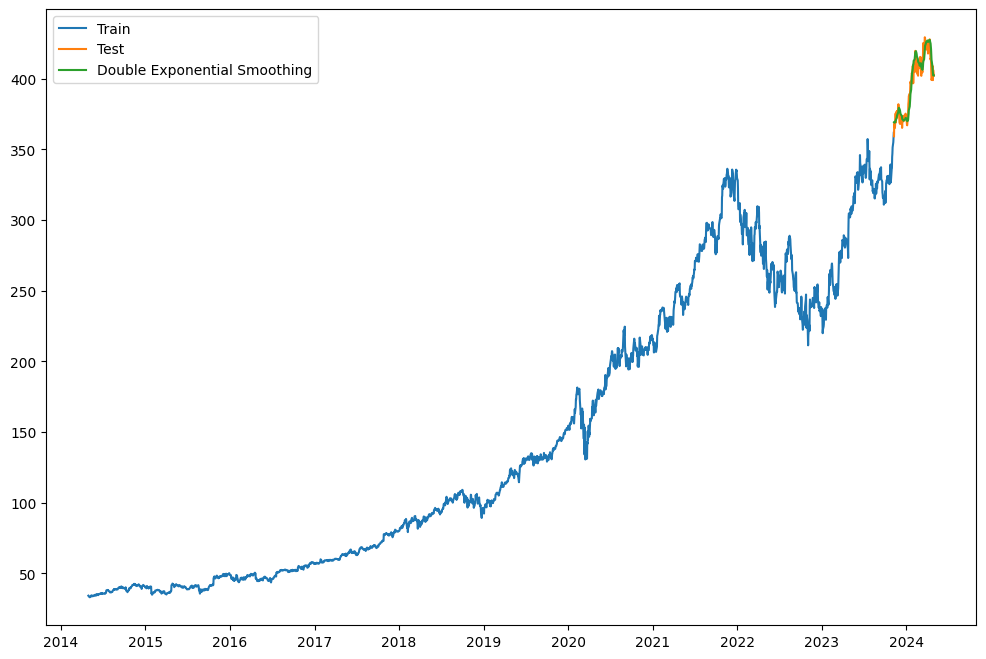

In [174]:
plt.figure(figsize=(12,8))
plt.plot(train_size, label = 'Train')
plt.plot(test_size, label = 'Test')
plt.plot(data_model['DES'], label = 'Double Exponential Smoothing')
plt.legend(loc = 'best')
plt.show()

In [175]:
rmse_des = np.sqrt(mean_squared_error(test_size,pred_des))
mape_des = MAPE(pred_des,test_size.Close)
print('Double Exponential Method Evaluation','\n',\
      'Mean Absolute Percentage = {}'.format(mape_des),'\n',\
      'Root Mean Squared Error = {}'.format(rmse_des))

Double Exponential Method Evaluation 
 Mean Absolute Percentage = 1.1767045973840415 
 Root Mean Squared Error = 5.894606514944476


###Triple Exponential Method(Holt Winter Method)

In [176]:
model_tes = ExponentialSmoothing(train_size['Close'], trend = 'add', seasonal = 'add', seasonal_periods = 12)
fitted_tes = model_tes.fit(smoothing_level = 0.15, optimized = True)
pred_train_tes = fitted_tes.fittedvalues.shift(-1)
pred_train_tes.fillna(method = 'ffill',inplace = True)

In [177]:
model_tes = ExponentialSmoothing(test_size['Close'], trend = 'add', seasonal = 'add', seasonal_periods = 12)
fitted_tes = model_tes.fit(smoothing_level = 0.15, optimized = True)
pred_tes = fitted_tes.fittedvalues.shift(-1)
pred_tes.fillna(method = 'ffill',inplace = True)

In [178]:
data_model['TES'] = pred_tes
data_model.tail()

Close  Perct_change         SES         DES         TES
Date                                                                    
2024-04-24  409.059998      0.365579  411.268729  406.609721  406.241850
2024-04-25  399.040009     -2.449516  409.434421  403.700100  403.495253
2024-04-26  406.320007      1.824378  408.967259  402.377871  402.693426
2024-04-29  402.250000     -1.001675  408.967259  402.377871  402.693426
2024-04-30  396.315002     -1.475450         NaN         NaN         NaN

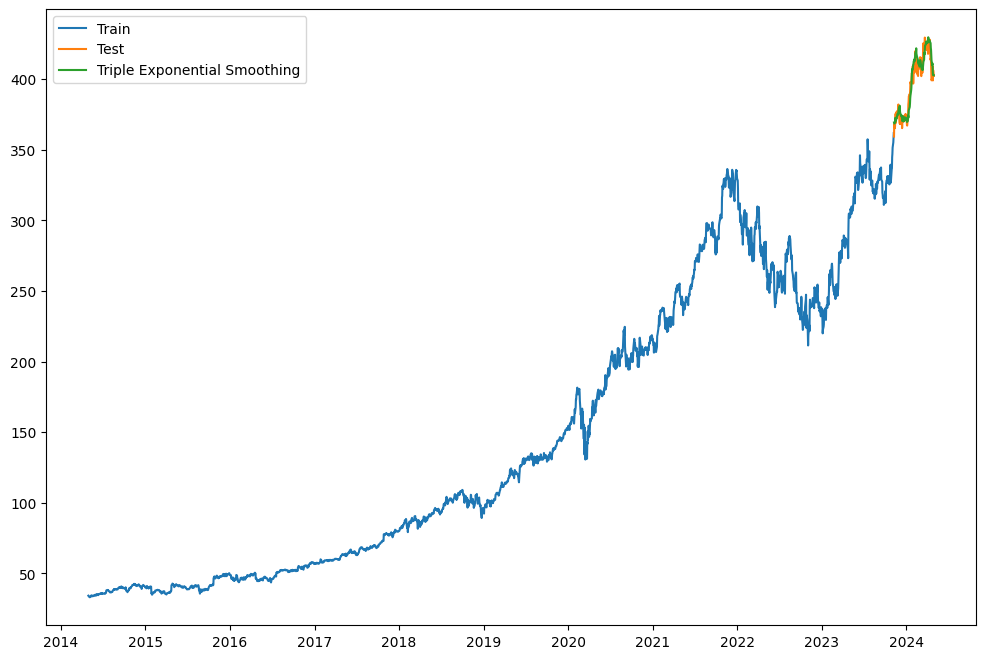

In [179]:
plt.figure(figsize=(12,8))
plt.plot(train_size, label = 'Train')
plt.plot(test_size, label = 'Test')
plt.plot(data_model['TES'], label = ('Triple Exponential Smoothing'))
plt.legend(loc = 'best')
plt.show()

In [180]:
rmse_tes = np.sqrt(mean_squared_error(test_size,pred_tes))
mape_tes = MAPE(pred_tes,test_size.Close)
print('Triple Exponential Method Evaluation','\n',\
      'Mean Absolute Percentage = {}'.format(mape_tes),'\n',\
      'Root Mean Squared Error = {}'.format(rmse_tes))

Triple Exponential Method Evaluation 
 Mean Absolute Percentage = 1.189369354656441 
 Root Mean Squared Error = 5.99313233822909


### Triple exponential model with Multiplicative trend and seasonality

In [181]:
model_tes1 = ExponentialSmoothing(test_size['Close'], trend = 'mul', seasonal = 'mul', seasonal_periods = 12)
fitted_tes1 = model_tes1.fit(smoothing_level = 0.15, optimized = True)
pred_tes1 = fitted_tes1.fittedvalues.shift(-1)
pred_tes1.fillna(method ='ffill', inplace = True)

In [182]:
data_model['TES1'] = pred_tes1
data_model.tail()

Close  Perct_change         SES         DES         TES  \
Date                                                                       
2024-04-24  409.059998      0.365579  411.268729  406.609721  406.241850   
2024-04-25  399.040009     -2.449516  409.434421  403.700100  403.495253   
2024-04-26  406.320007      1.824378  408.967259  402.377871  402.693426   
2024-04-29  402.250000     -1.001675  408.967259  402.377871  402.693426   
2024-04-30  396.315002     -1.475450         NaN         NaN         NaN   

                  TES1  
Date                    
2024-04-24  413.001284  
2024-04-25  411.161906  
2024-04-26  411.162825  
2024-04-29  411.162825  
2024-04-30         NaN

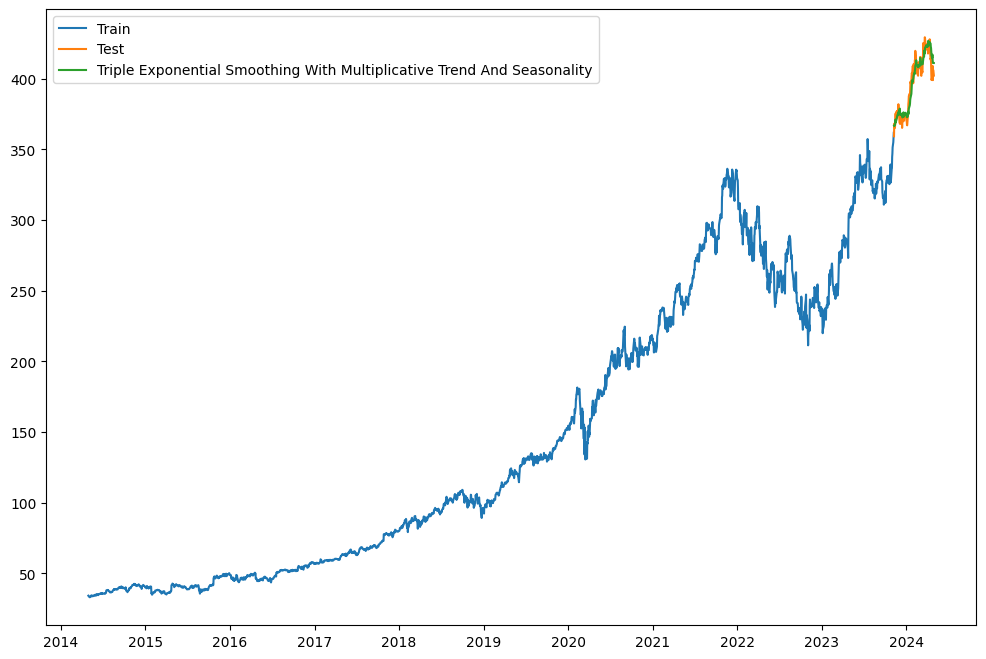

In [183]:
plt.figure(figsize=(12,8))
plt.plot(train_size, label = 'Train')
plt.plot(test_size, label = 'Test')
plt.plot(data_model['TES1'], label = ('Triple Exponential Smoothing With Multiplicative Trend And Seasonality'))
plt.legend(loc = 'best')
plt.show()

In [184]:
rmse_tes1 = np.sqrt(mean_squared_error(test_size,pred_tes1))
mape_tes1 = MAPE(pred_tes1,test_size.Close)
print('Triple Exoponential Method Evaluation With Multiplicative Seasonality and Trend','\n',\
      'Mean Absolute Percentage = {}'.format(mape_tes1),'\n',\
      'Root Mean Squared Error = {}'.format(rmse_tes1))

Triple Exoponential Method Evaluation With Multiplicative Seasonality and Trend 
 Mean Absolute Percentage = 1.1799172315669955 
 Root Mean Squared Error = 5.983693298548931


### Triple Exponential Smoothing With Multiplcative Trend And Additive seasonality

In [185]:
model_tes2 = ExponentialSmoothing(test_size['Close'], trend = 'mul', seasonal = 'add', seasonal_periods = 12)
fitted_ses2 = model_tes2.fit(smoothing_level = 0.15, optimized = True)
pred_tes2 = fitted_ses2.fittedvalues.shift(-1)
pred_tes2.fillna(method = 'ffill', inplace = True)

In [186]:
data_model['TES2'] = pred_tes2
data_model.tail()

Close  Perct_change         SES         DES         TES  \
Date                                                                       
2024-04-24  409.059998      0.365579  411.268729  406.609721  406.241850   
2024-04-25  399.040009     -2.449516  409.434421  403.700100  403.495253   
2024-04-26  406.320007      1.824378  408.967259  402.377871  402.693426   
2024-04-29  402.250000     -1.001675  408.967259  402.377871  402.693426   
2024-04-30  396.315002     -1.475450         NaN         NaN         NaN   

                  TES1        TES2  
Date                                
2024-04-24  413.001284  412.996263  
2024-04-25  411.161906  411.221186  
2024-04-26  411.162825  411.165826  
2024-04-29  411.162825  411.165826  
2024-04-30         NaN         NaN

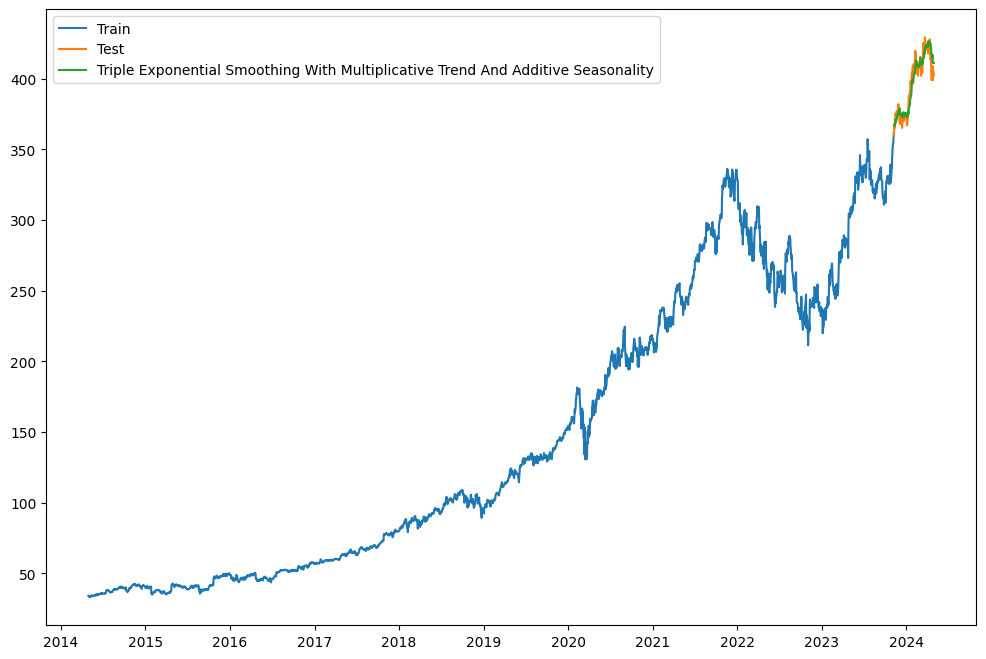

In [187]:
plt.figure(figsize=(12,8))
plt.plot(train_size, label = 'Train')
plt.plot(test_size, label = 'Test')
plt.plot(data_model['TES2'], label = (('Triple Exponential Smoothing With Multiplicative Trend And Additive Seasonality')))
plt.legend(loc = 'best')
plt.show()

In [188]:
rmse_tes2  = np.sqrt(mean_squared_error(test_size, pred_tes2))
mape_tes2 = MAPE(pred_tes2,test_size.Close)
print('Triple Exponential Method Evaluation With Multiplicative trend and Additive Seasonality','\n',\
      'Mean Absolute Percentage = {}'.format(mape_tes2),'\n',\
      'Root Mean Squared Error = {}'.format(rmse_tes2))

Triple Exponential Method Evaluation With Multiplicative trend and Additive Seasonality 
 Mean Absolute Percentage = 1.182620993500935 
 Root Mean Squared Error = 5.988318592875155


Comparing the results

In [189]:
Evaluation = {'Models':pd.Series(['Simple_Exp','Double_Exp','Triple_Exp','Triple_Exp_mul','Triple_Exo_mul_add']),\
              'Test_RMSE':pd.Series([rmse_ses,rmse_des,rmse_tes,rmse_tes1,rmse_tes2]),\
              'Test_MAPE':pd.Series([mape_ses,mape_des,mape_tes,mape_tes1,mape_tes2])}
table_evaluation=pd.DataFrame(Evaluation)
table_evaluation.sort_values(['Test_MAPE'], inplace=True, ignore_index=True)
table_evaluation

Models  Test_RMSE  Test_MAPE
0          Double_Exp   5.894607   1.176705
1      Triple_Exp_mul   5.983693   1.179917
2  Triple_Exo_mul_add   5.988319   1.182621
3          Triple_Exp   5.993132   1.189369
4          Simple_Exp   6.356989   1.280318

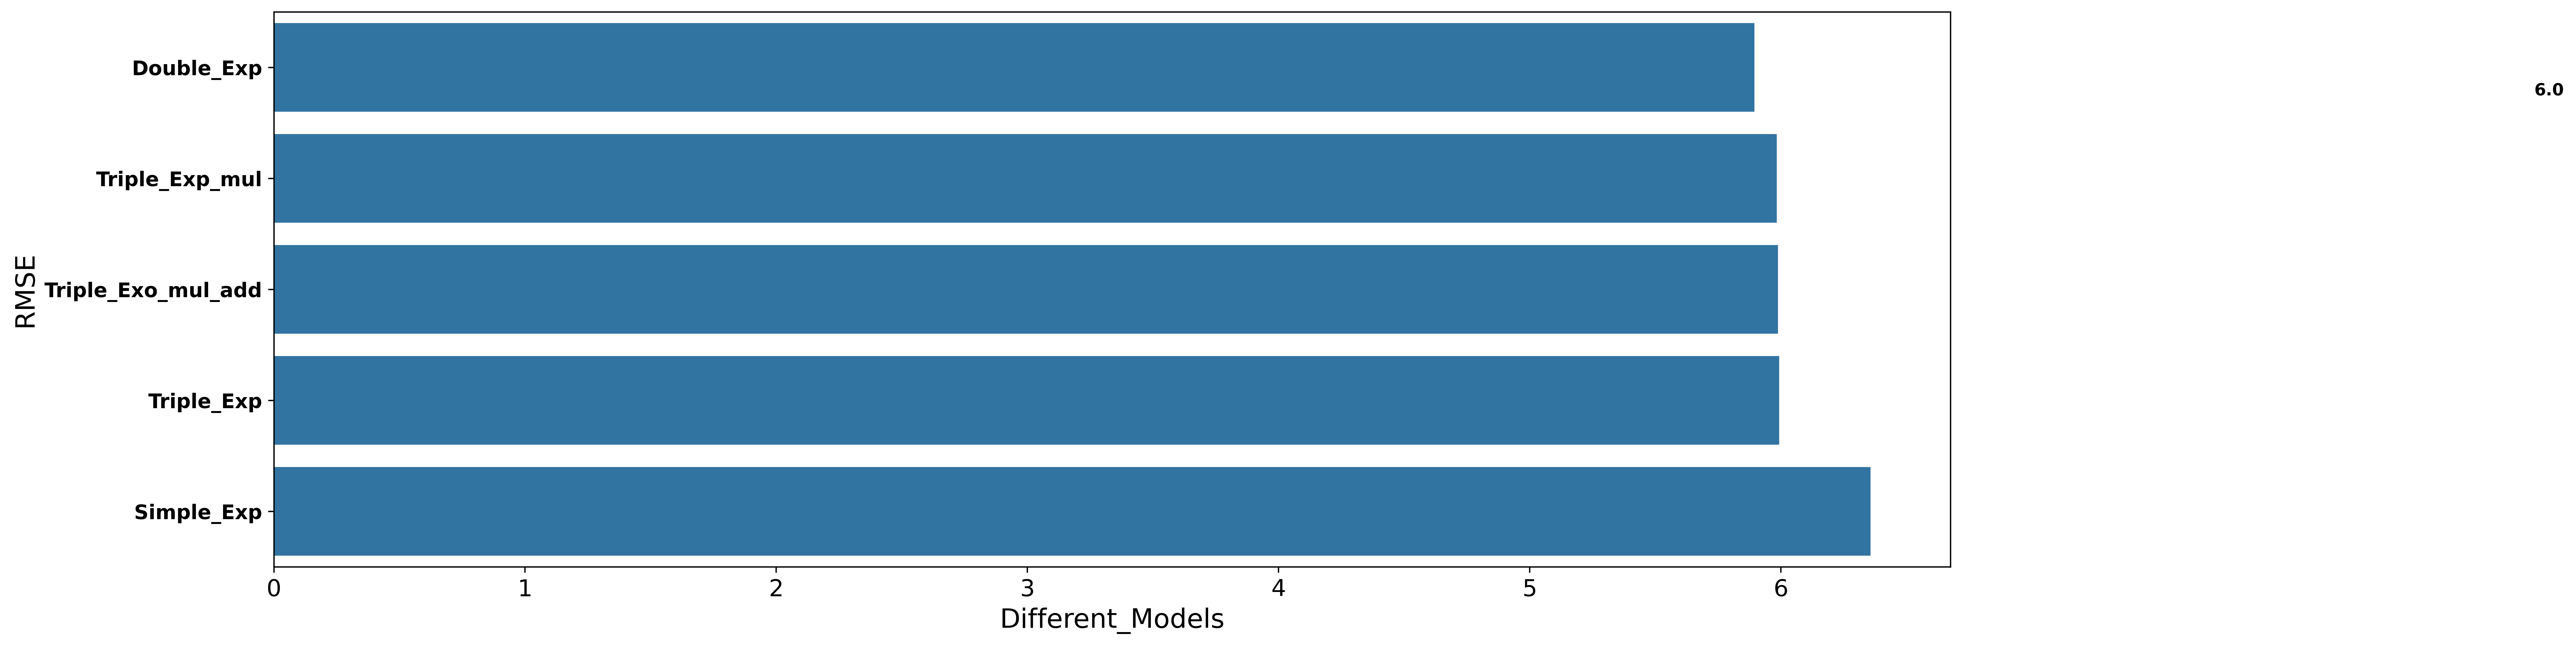

In [190]:
f, axe = plt.subplots(1,1, figsize=(18,6),dpi = 500)
sns.barplot(x = 'Test_RMSE', y = 'Models', data = table_evaluation, ax = axe)
axe.set_xlabel('Different_Models', size = 16)
axe.set_ylabel('RMSE', size = 16)
plt.yticks(fontsize = 12, fontweight = 'bold')
plt.xticks(fontsize = 14)

for item, v in enumerate(np.round(table_evaluation.Test_RMSE.values,0)):
  axe.text(v + 3, item + .25, str(v),
           color = 'black', fontweight = 'bold', fontsize = 10)
  plt.show()

### Naive Model

In [191]:
naive_model = train_size['Close'].tolist()


predictions = []
for i in range(len(test_size)):
  yhat = naive_model[-1]
  predictions.append(yhat)
  naive_model.append(test_size.iloc[i, 0])

predictions

[361.7952880859375,
 359.29498291015625,
 368.2402648925781,
 365.2618103027344,
 368.8379211425781,
 368.9876708984375,
 375.4756774902344,
 369.1673278808594,
 376.7433166503906,
 372.3813781738281,
 377.1525573730469,
 376.7333068847656,
 377.9111328125,
 381.9936218261719,
 378.15069580078125,
 378.2106018066406,
 373.8187255859375,
 368.4586486816406,
 371.8323669433594,
 368.1192321777344,
 370.2652893066406,
 373.53924560546875,
 370.6146240234375,
 373.68896484375,
 373.678955078125,
 365.2545471191406,
 370.04571533203125,
 371.9621276855469,
 372.571044921875,
 369.9358825683594,
 372.85052490234375,
 373.8885803222656,
 373.96844482421875,
 373.3795471191406,
 374.5872802734375,
 375.34588623046875,
 370.1854248046875,
 369.9159240722656,
 367.2608337402344,
 367.0711975097656,
 373.9983825683594,
 375.09637451171875,
 382.0634460449219,
 383.9200439453125,
 387.7529602050781,
 389.54962158203125,
 388.7510986328125,
 393.1429748535156,
 397.93414306640625,
 395.778106689453

In [192]:
rmse_naive = np.sqrt(mean_squared_error(test_size, predictions))
mape_naive = MAPE(predictions, test_size.Close)
print('Naive Model', '\n',
      'Mean Absolute error = {}'.format(mape_naive), '\n',
      'Root Mean Squared Error = {}'.format(rmse_naive))

Naive Model 
 Mean Absolute error = 0.9226408222643434 
 Root Mean Squared Error = 4.69429892705195


### Linear Model

In [193]:
data_model.reset_index(inplace = True)
data_model

Date       Close  Perct_change         SES         DES         TES  \
0    2014-04-30   34.210911           NaN         NaN         NaN         NaN   
1    2014-05-01   33.872192     -0.990089         NaN         NaN         NaN   
2    2014-05-02   33.609680     -0.775008         NaN         NaN         NaN   
3    2014-05-05   33.389515     -0.655065         NaN         NaN         NaN   
4    2014-05-06   33.076199     -0.938367         NaN         NaN         NaN   
...         ...         ...           ...         ...         ...         ...   
2513 2024-04-24  409.059998      0.365579  411.268729  406.609721  406.241850   
2514 2024-04-25  399.040009     -2.449516  409.434421  403.700100  403.495253   
2515 2024-04-26  406.320007      1.824378  408.967259  402.377871  402.693426   
2516 2024-04-29  402.250000     -1.001675  408.967259  402.377871  402.693426   
2517 2024-04-30  396.315002     -1.475450         NaN         NaN         NaN   

            TES1        TES2  
0            NaN         NaN  
1            NaN         NaN  
2            NaN         NaN  
3            NaN         NaN  
4            NaN         NaN  
...          ...         ...  
2513  413.001284  412.996263  
2514  411.161906  411.221186  
2515  411.162825  411.165826  
2516  411.162825  411.165826  
2517         NaN         NaN  

[2518 rows x 8 columns]

In [194]:
data_model['t'] = np.arange(1,len(data_model)+1)
data_model['t_squared'] = np.square(data_model.t)
data_model['Month'] = data_model.Date.dt.strftime('%b')
data_model['year'] = data_model.Date.dt.strftime('%Y')
model = pd.get_dummies(data_model['Month']).astype(int)
model = model[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
data_model = pd.concat([data_model,model],axis=1)
data_model['Log_Close'] = np.log(data_model['Close'])
data_model.set_index(data_model['Date'], inplace = True)
data_model.drop('Date', axis = 1, inplace = True)
data_model.head()

Close  Perct_change  SES  DES  TES  TES1  TES2  t  t_squared  \
Date                                                                           
2014-04-30  34.210911           NaN  NaN  NaN  NaN   NaN   NaN  1          1   
2014-05-01  33.872192     -0.990089  NaN  NaN  NaN   NaN   NaN  2          4   
2014-05-02  33.609680     -0.775008  NaN  NaN  NaN   NaN   NaN  3          9   
2014-05-05  33.389515     -0.655065  NaN  NaN  NaN   NaN   NaN  4         16   
2014-05-06  33.076199     -0.938367  NaN  NaN  NaN   NaN   NaN  5         25   

           Month  ... Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec  Log_Close  
Date              ...                                                         
2014-04-30   Apr  ...   1    0    0    0    0    0    0    0    0   3.532545  
2014-05-01   May  ...   0    1    0    0    0    0    0    0    0   3.522594  
2014-05-02   May  ...   0    1    0    0    0    0    0    0    0   3.514814  
2014-05-05   May  ...   0    1    0    0    0    0    0    0    0   3.508242  
2014-05-06   May  ...   0    1    0    0    0    0    0    0    0   3.498814  

[5 rows x 24 columns]

Train and test split

In [195]:
train_model = data_model.iloc[:2350]
test_model = data_model.iloc[2350:]

LInear Model

In [196]:
linear_model  = smf.ols('Close~t', data = train_model).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test_model['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test_model['Close'])-np.array(pred_linear))**2))
mape_linear = MAPE(pred_linear, test_model['Close'])

In [197]:
print('Linear Model Model Evaluation','\n',\
      'Mean Absolute Percentage = {}'.format(mape_linear),'\n',\
      'Root Mean Squared Error = {}'.format(rmse_linear))

Linear Model Model Evaluation 
 Mean Absolute Percentage = 17.100660721410044 
 Root Mean Squared Error = 72.9526759208297


### Exponential model

In [198]:
exponential = smf.ols('Log_Close~t', data =  train_model).fit()
pred_exponential = pd.Series(exponential.predict(pd.DataFrame(test_model['t'])))
rmse_exponential = np.sqrt(np.mean((np.array(test_model['Close'])-np.array(pred_exponential))**2))
mape_exponential = MAPE(pred_exponential, test_model['Close'])

In [199]:
print('Exponential Model Evaluation','\n',\
      'Mean Absolute Percentage = {}'.format(mape_exponential),'\n',\
      'Root Mean Squared Error = {}'.format(rmse_exponential))

Exponential Model Evaluation 
 Mean Absolute Percentage = 98.37948249773824 
 Root Mean Squared Error = 372.3155208246561


In [200]:
exponential.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Log_Close   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                 6.768e+04
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:32:12   Log-Likelihood:                 1335.0
No. Observations:                2350   AIC:                            -2666.
Df Residuals:                    2348   BIC:                            -2655.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4108      0.006    602.559      0.000       3.400       3.422
t              0.0011   4.17e-06    260.162      0.000       0.001       0.001
==============================================================================
Omnibus:                       12.921   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                9.547
Skew:                           0.024   Prob(JB):                      0.00845
Kurtosis:                       2.691   Cond. No.                     2.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Quadratic Model

In [201]:
quad = smf.ols('Close~t+t_squared', data = train_model).fit()
pred_quad = pd.Series(quad.predict(test_model[['t','t_squared']]))
rmse_quad = np.sqrt(np.mean((np.array(test_model['Close'])-np.array(pred_quad))**2))
mape_quad = MAPE(pred_quad, test_model['Close'])

In [202]:
print('Quadratic Model Evaluation','\n',\
      'Mean Absolute Percentage = {}'.format(mape_quad),'\n',\
      'Root Mean Squared Error = {}'.format(rmse_quad))

Quadratic Model Evaluation 
 Mean Absolute Percentage = 6.881490050112065 
 Root Mean Squared Error = 29.98623757715481


In [203]:
quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                 1.570e+04
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:32:12   Log-Likelihood:                -10934.
No. Observations:                2350   AIC:                         2.187e+04
Df Residuals:                    2347   BIC:                         2.189e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.9918      1.573     15.255      0.000      20.908      27.076
t              0.0303      0.003      9.814      0.000       0.024       0.036
t_squared   4.418e-05   1.27e-06     34.718      0.000    4.17e-05    4.67e-05
==============================================================================
Omnibus:                      254.601   Durbin-Watson:                   0.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              721.745
Skew:                           0.580   Prob(JB):                    1.88e-157
Kurtosis:                       5.455   Cond. No.                     7.42e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.42e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Additive Seasonality

In [204]:
add_sea = smf.ols('Close~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_model).fit()
pred_add = pd.Series(add_sea.predict(test_model[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add = np.sqrt(np.mean((np.array(test_model['Close'])-np.array(pred_add))**2))
Mape_add = MAPE(pred_add, test_model['Close'])

In [205]:
print('Additive Seasonality','\n',\
      'Mean Absolute Percentage Error = {}'.format(Mape_add),'\n',\
      'Root Mean Squared Error = {}'.format(rmse_add))

Additive Seasonality 
 Mean Absolute Percentage Error = 62.96670499992594 
 Root Mean Squared Error = 240.03222512365224


In [206]:
add_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9073
Date:                Tue, 30 Apr 2024   Prob (F-statistic):              0.532
Time:                        16:32:12   Log-Likelihood:                -14062.
No. Observations:                2350   AIC:                         2.815e+04
Df Residuals:                    2338   BIC:                         2.822e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    129.9897      1.838     70.707      0.000     126.385     133.595
Jan            7.1169      6.835      1.041      0.298      -6.286      20.520
Feb           12.2756      6.999      1.754      0.080      -1.449      26.000
Mar           12.9614      6.527      1.986      0.047       0.163      25.760
Apr           16.2156      6.766      2.397      0.017       2.948      29.483
May            8.7366      6.368      1.372      0.170      -3.751      21.224
Jun           12.9439      6.327      2.046      0.041       0.537      25.351
Jul           18.0791      6.382      2.833      0.005       5.564      30.594
Aug           21.9533      6.248      3.514      0.000       9.702      34.205
Sep            1.1111      6.766      0.164      0.870     -12.157      14.379
Oct           -0.3703      6.557     -0.056      0.955     -13.228      12.488
Nov            8.4957      6.783      1.253      0.211      -4.806      21.797
Dec           10.4708      6.683      1.567      0.117      -2.634      23.576
==============================================================================
Omnibus:                     1461.503   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              245.091
Skew:                           0.540   Prob(JB):                     6.01e-54
Kurtosis:                       1.843   Cond. No.                     3.04e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.76e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Additive Seasonality With Quadratic Trend

In [207]:
add_sea_sea = smf.ols('Close~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec', data = train_model).fit()
pred_add_sea = pd.Series(add_sea.predict(test_model[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_squared']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test_model['Close'])-np.array(pred_add_sea))**2))
mape_add_sea = MAPE(pred_add_sea, test_model['Close'])

In [208]:
print('Additive Seasonality With Quadratic Trend Model Evaluation','\n',\
      'Mean Absolute Percentage = {}'.format(mape_add_sea),'\n',\
      'Root Mean Squared Error = {}'.format(rmse_add_sea))

Additive Seasonality With Quadratic Trend Model Evaluation 
 Mean Absolute Percentage = 62.96670499992594 
 Root Mean Squared Error = 240.03222512365224


In [209]:
add_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9073
Date:                Tue, 30 Apr 2024   Prob (F-statistic):              0.532
Time:                        16:32:13   Log-Likelihood:                -14062.
No. Observations:                2350   AIC:                         2.815e+04
Df Residuals:                    2338   BIC:                         2.822e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    129.9897      1.838     70.707      0.000     126.385     133.595
Jan            7.1169      6.835      1.041      0.298      -6.286      20.520
Feb           12.2756      6.999      1.754      0.080      -1.449      26.000
Mar           12.9614      6.527      1.986      0.047       0.163      25.760
Apr           16.2156      6.766      2.397      0.017       2.948      29.483
May            8.7366      6.368      1.372      0.170      -3.751      21.224
Jun           12.9439      6.327      2.046      0.041       0.537      25.351
Jul           18.0791      6.382      2.833      0.005       5.564      30.594
Aug           21.9533      6.248      3.514      0.000       9.702      34.205
Sep            1.1111      6.766      0.164      0.870     -12.157      14.379
Oct           -0.3703      6.557     -0.056      0.955     -13.228      12.488
Nov            8.4957      6.783      1.253      0.211      -4.806      21.797
Dec           10.4708      6.683      1.567      0.117      -2.634      23.576
==============================================================================
Omnibus:                     1461.503   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              245.091
Skew:                           0.540   Prob(JB):                     6.01e-54
Kurtosis:                       1.843   Cond. No.                     3.04e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.76e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Multiplicative Seasonality

In [210]:
mul_sea = smf.ols('Log_Close~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train_model).fit()
pred_mul = pd.Series(mul_sea.predict(test_model[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_mul = np.sqrt(np.mean((np.array(test_model['Close'])-np.array(np.exp(pred_mul)))**2))
mape_mul = MAPE(pred_mul, test_model['Close'])

In [211]:
print('Multiplicative Seasonality','\n',\
      'Mean Absolute Percentage = {}'.format(mape_mul),'\n',\
      'Root Mean Squared Error = {}'.format(rmse_mul))

Multiplicative Seasonality 
 Mean Absolute Percentage = 98.74569618408324 
 Root Mean Squared Error = 270.17562110795944


In [212]:
mul_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Log_Close   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.5766
Date:                Tue, 30 Apr 2024   Prob (F-statistic):              0.849
Time:                        16:32:13   Log-Likelihood:                -2651.4
No. Observations:                2350   AIC:                             5327.
Df Residuals:                    2338   BIC:                             5396.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3257      0.014    302.196      0.000       4.298       4.354
Jan            0.3628      0.053      6.817      0.000       0.258       0.467
Feb            0.3822      0.054      7.014      0.000       0.275       0.489
Mar            0.3937      0.051      7.747      0.000       0.294       0.493
Apr            0.4106      0.053      7.794      0.000       0.307       0.514
May            0.3241      0.050      6.536      0.000       0.227       0.421
Jun            0.3443      0.049      6.990      0.000       0.248       0.441
Jul            0.3788      0.050      7.624      0.000       0.281       0.476
Aug            0.4119      0.049      8.468      0.000       0.317       0.507
Sep            0.2900      0.053      5.505      0.000       0.187       0.393
Oct            0.2942      0.051      5.762      0.000       0.194       0.394
Nov            0.3626      0.053      6.866      0.000       0.259       0.466
Dec            0.3704      0.052      7.119      0.000       0.268       0.472
==============================================================================
Omnibus:                    17030.837   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.560
Skew:                          -0.012   Prob(JB):                     1.89e-46
Kurtosis:                       1.534   Cond. No.                     3.04e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.76e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Build model on the whole dataset.
( Quadratic Model )

In [213]:
full_model = smf.ols('Close~t+t_squared', data = data_model).fit()
pred_full = pd.Series(full_model.predict(test_model))
pred_full

Date
2023-08-30    346.827779
2023-08-31    347.079532
2023-09-01    347.331384
2023-09-05    347.583334
2023-09-06    347.835382
                 ...    
2024-04-24    389.163282
2024-04-25    389.431081
2024-04-26    389.698979
2024-04-29    389.966975
2024-04-30    390.235070
Length: 168, dtype: float64

In [214]:
data_model['Quad_Forecasted'] = pred_full
data_model.tail()

Close  Perct_change         SES         DES         TES  \
Date                                                                       
2024-04-24  409.059998      0.365579  411.268729  406.609721  406.241850   
2024-04-25  399.040009     -2.449516  409.434421  403.700100  403.495253   
2024-04-26  406.320007      1.824378  408.967259  402.377871  402.693426   
2024-04-29  402.250000     -1.001675  408.967259  402.377871  402.693426   
2024-04-30  396.315002     -1.475450         NaN         NaN         NaN   

                  TES1        TES2     t  t_squared Month  ... May  Jun  Jul  \
Date                                                       ...                 
2024-04-24  413.001284  412.996263  2514    6320196   Apr  ...   0    0    0   
2024-04-25  411.161906  411.221186  2515    6325225   Apr  ...   0    0    0   
2024-04-26  411.162825  411.165826  2516    6330256   Apr  ...   0    0    0   
2024-04-29  411.162825  411.165826  2517    6335289   Apr  ...   0    0    0   
2024-04-30         NaN         NaN  2518    6340324   Apr  ...   0    0    0   

            Aug  Sep  Oct  Nov  Dec  Log_Close  Quad_Forecasted  
Date                                                             
2024-04-24    0    0    0    0    0   6.013862       389.163282  
2024-04-25    0    0    0    0    0   5.989062       389.431081  
2024-04-26    0    0    0    0    0   6.007141       389.698979  
2024-04-29    0    0    0    0    0   5.997074       389.966975  
2024-04-30    0    0    0    0    0   5.982209       390.235070  

[5 rows x 25 columns]

### Test of stationary

In [215]:
def adf_test(data):
  result = sts.adfuller(data)
  labels = ['ADF test statistic','p-value','# lags used','# observations']
  out = pd.Series(result[0:4], index = labels)
  if result[1]<=0.05:
    print('The time series is likely stationary.')
    print(out)
  else:
    print('The time series is likely non-stationary.')
    print(out)

In [216]:
adf_test(data_model['Close'])

The time series is likely non-stationary.
ADF test statistic       0.724507
p-value                  0.990314
# lags used              9.000000
# observations        2508.000000
dtype: float64


In [217]:
def  test_stationarity(timeseries):

  # Determine rolling statistice
  movingAverage = timeseries.rolling(window = 4).mean()
  movingSTD = timeseries.rolling(window = 4).std()

  # Plot rollling statistics
  orig = plt.plot(timeseries, color = 'blue', label = 'Orginal')
  mean = plt.plot(movingAverage, color = 'green', label = 'Rolling Mean')
  plt.legend(loc = 'best')
  plt.title('Rolling Mean')
  plt.show(block = False)

  # Perform Augmented Test
  print('Results of Dicky Fuller Test:')
  dftest = adfuller(timeseries['Close'], autolag = 'AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
  for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)

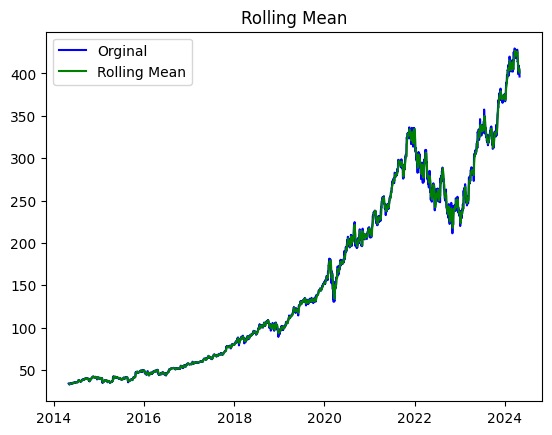

Results of Dicky Fuller Test:
Test Statistic                    0.724507
p-value                           0.990314
#Lags Used                        9.000000
Number of Observations Used    2508.000000
Critical Value (1%)              -3.432960
Critical Value (5%)              -2.862693
Critical Value (10%)             -2.567384
dtype: float64


In [218]:
df =  pd.DataFrame()
df['Close'] = data_model['Close']
test_stationarity(df)

### Feature Scalling Transformation.

#### Normalization

In [219]:
scaler = StandardScaler()

In [220]:
norm_data = data_model[['Close']]
norm_data = scaler.fit_transform(norm_data)
norm_data

array([[-1.10996486],
       [-1.11303322],
       [-1.11541125],
       ...,
       [ 2.260872  ],
       [ 2.22400289],
       [ 2.17023934]])

Text(0.5, 1.0, 'After Standardising Data')

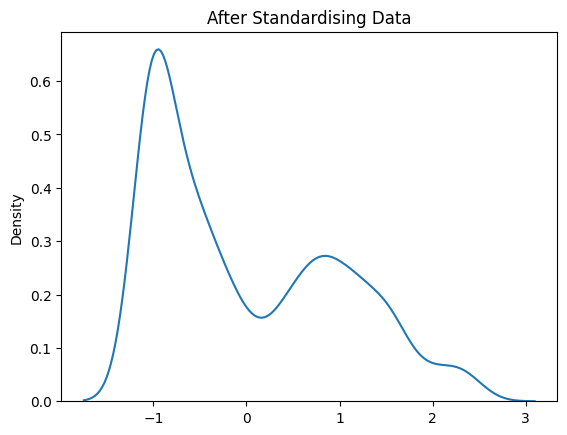

In [221]:
sns.kdeplot(data = norm_data.flatten())
plt.title('After Standardising Data')

In [222]:
adf_test(norm_data)

The time series is likely non-stationary.
ADF test statistic       0.724507
p-value                  0.990314
# lags used              9.000000
# observations        2508.000000
dtype: float64


#### Square root transformation

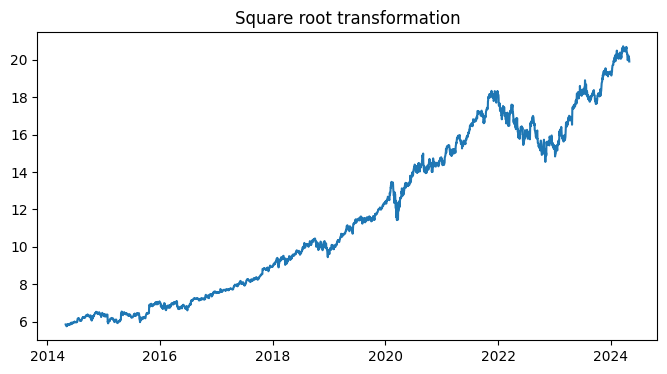

In [223]:
square_root = pd.DataFrame()
square_root = data_model[['Close']]
square_root['Sqrt'] = np.sqrt(square_root.Close)

# line chart
fig = plt.figure(figsize=(8,4))
plt.title('Square root transformation')
plt.plot(square_root['Sqrt'])

In [224]:
adf_test(square_root['Sqrt'])

The time series is likely non-stationary.
ADF test statistic       0.298845
p-value                  0.977291
# lags used              9.000000
# observations        2508.000000
dtype: float64


#### Log transformation

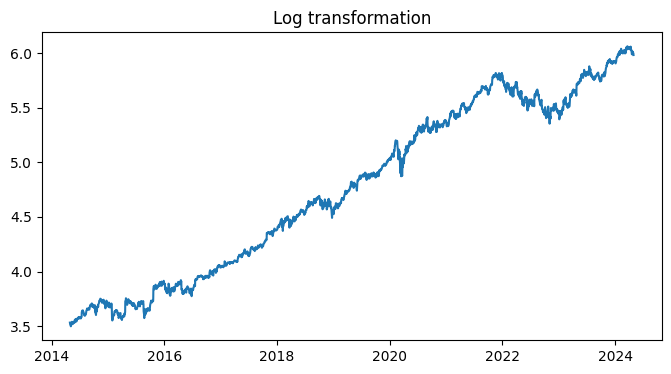

In [225]:
log = pd.DataFrame()
log = data_model[['Close']]
log['Log'] = np.log(log.Close)

# Line Chart
fig = plt.figure(figsize=(8,4))
plt.title('Log transformation')
plt.plot(log['Log'])

In [226]:
adf_test(log['Log'])

The time series is likely non-stationary.
ADF test statistic      -0.490569
p-value                  0.893844
# lags used              9.000000
# observations        2508.000000
dtype: float64


In [227]:
log

Close       Log
Date                            
2014-04-30   34.210911  3.532545
2014-05-01   33.872192  3.522594
2014-05-02   33.609680  3.514814
2014-05-05   33.389515  3.508242
2014-05-06   33.076199  3.498814
...                ...       ...
2024-04-24  409.059998  6.013862
2024-04-25  399.040009  5.989062
2024-04-26  406.320007  6.007141
2024-04-29  402.250000  5.997074
2024-04-30  396.315002  5.982209

[2518 rows x 2 columns]

#### Differencing Log Transformation

In [228]:
diff_log = log['Log'] - log['Log'].shift()
diff_log.dropna(inplace = True)
diff_log.head()

Date
2014-05-01   -0.009950
2014-05-02   -0.007780
2014-05-05   -0.006572
2014-05-06   -0.009428
2014-05-07    0.009175
Name: Log, dtype: float64

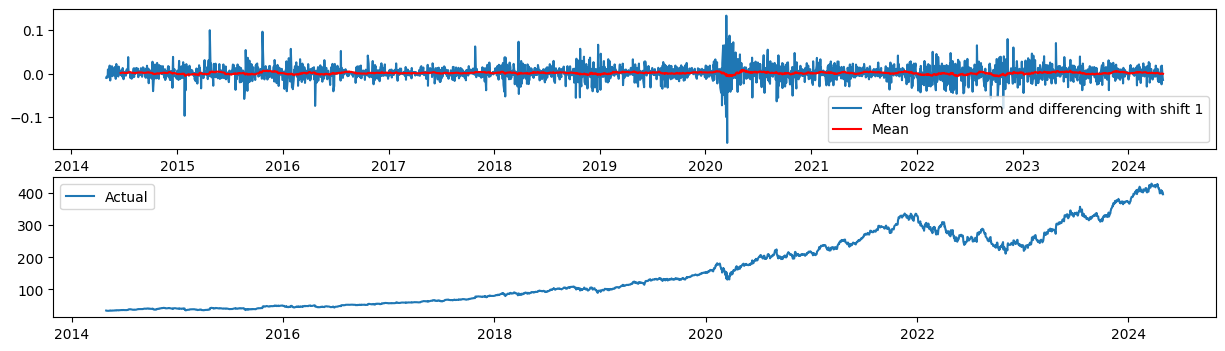

In [229]:
plt.figure(figsize=(15,4))
plt.subplot(211)
plt.plot(diff_log, label = 'After log transform and differencing with shift 1')
plt.legend(loc = 'best')
rolling_mean = diff_log.rolling(window = 36).mean()
plt.plot(rolling_mean, c = 'r', label = 'Mean')
plt.legend(loc = 'best')
plt.subplot(212)
plt.plot(data_model['Close'], label = 'Actual')
plt.legend(loc = 'best')
plt.show()

In [230]:
adf_test(diff_log)

The time series is likely stationary.
ADF test statistic   -1.744957e+01
p-value               4.660871e-30
# lags used           8.000000e+00
# observations        2.508000e+03
dtype: float64


#### Box cox transformation


Differencing is a technique used in time series analysis to transform a non-stationary time series into a stationary one. A time series is considered stationary if its mean and variance are constant over time and it does not exhibit any predictable patterns such as trends or seasonality. Differencing helps to remove these patterns and stabilize the data.

How Differencing Works
Differencing involves subtracting each data point in a time series from the data point at a previous time step. This effectively removes trends and seasonal patterns from the data. The resulting time series consists of the differences between consecutive data points.


Close
Date                
2014-04-30  3.532545
2014-05-01  3.522594
2014-05-02  3.514814
2014-05-05  3.508242
2014-05-06  3.498814

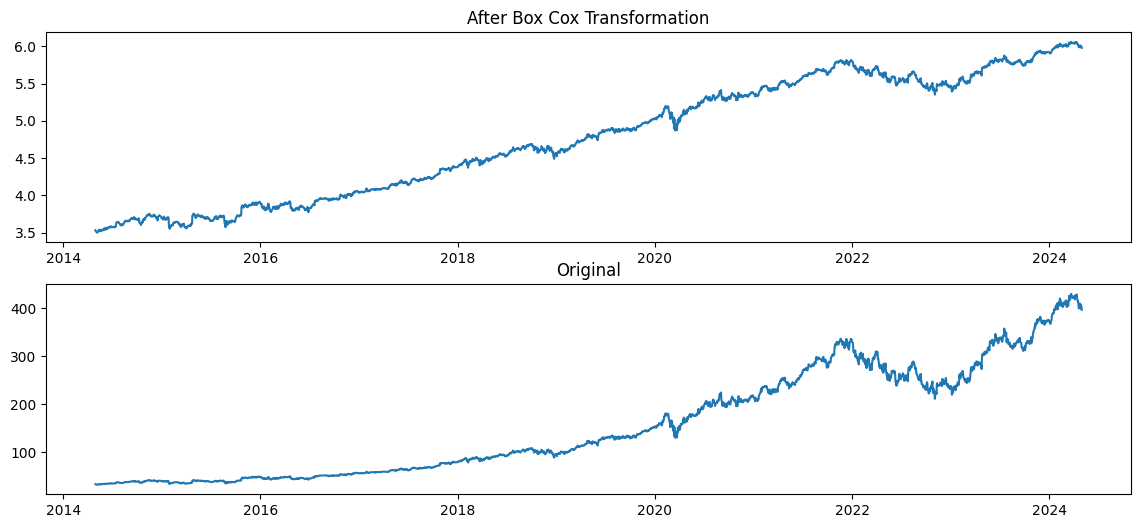

In [231]:
data_boxcox = pd.DataFrame()
data_boxcox['Close'] = pd.Series(boxcox(data_model['Close'], lmbda=0), data_model.index)
display(data_boxcox.head())
fig, axis = plt.subplots(2, figsize = (14,6))
axis[0].plot(data_boxcox)
axis[0].set_title('After Box Cox Transformation')
axis[1].plot(data_model['Close'], label='original')
axis[1].set_title('Original')
plt.show()

In [232]:
adf_test(data_boxcox)

The time series is likely non-stationary.
ADF test statistic      -0.490569
p-value                  0.893844
# lags used              9.000000
# observations        2508.000000
dtype: float64


#### Differencing of the box-cox transformation

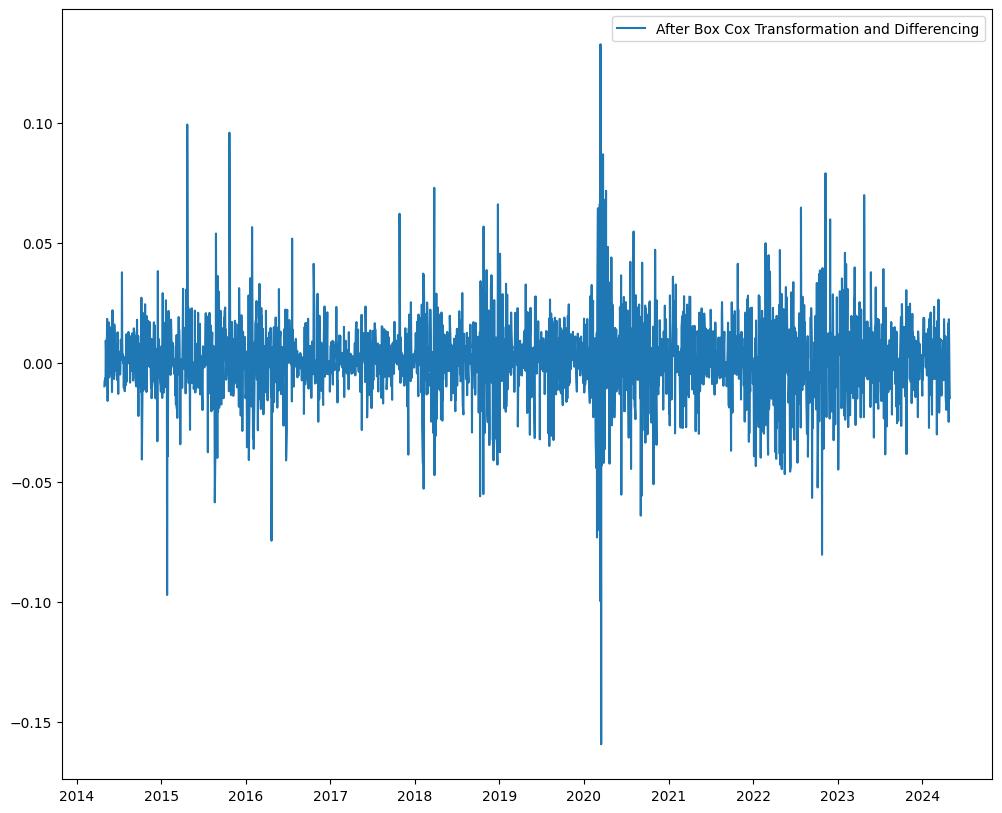

In [233]:
data_boxcox_diff = data_boxcox - data_boxcox.shift()
data_boxcox_diff.dropna(inplace = True)
plt.figure(figsize=(12,10))
plt.plot(data_boxcox_diff, label = 'After Box Cox Transformation and Differencing')
plt.legend( loc = 'best')
plt.show()

In [234]:
adf_test(data_boxcox_diff)

The time series is likely stationary.
ADF test statistic   -1.744957e+01
p-value               4.660871e-30
# lags used           8.000000e+00
# observations        2.508000e+03
dtype: float64


### Acf and pacf plots

Autocorrelation Function (ACF):

The ACF plot shows the correlation between the time series and its lagged values.
Each bar on the plot represents the correlation between the time series and its lagged values at different lags.
ACF helps in identifying the presence of autocorrelation in the time series data, which is the correlation between observations at different time points.
ACF can help identify the order of moving average (MA) process in a time series model.

Partial Autocorrelation Function (PACF):

The PACF plot shows the correlation between the time series and its lagged values after removing the effects of intervening lags.
Each bar on the plot represents the correlation between the time series and its lagged values at different lags, with the effects of intervening lags removed.
PACF helps in identifying the presence of autocorrelation in the time series data beyond the direct correlation with earlier lags.
PACF can help identify the order of autoregressive (AR) process in a time series model.

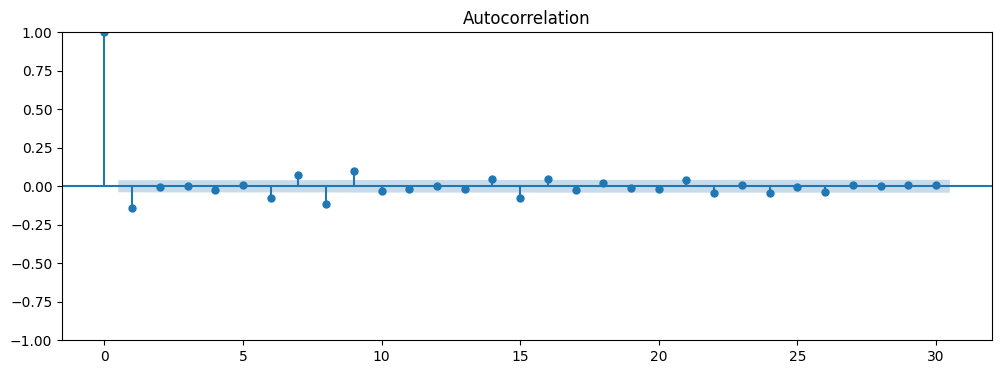

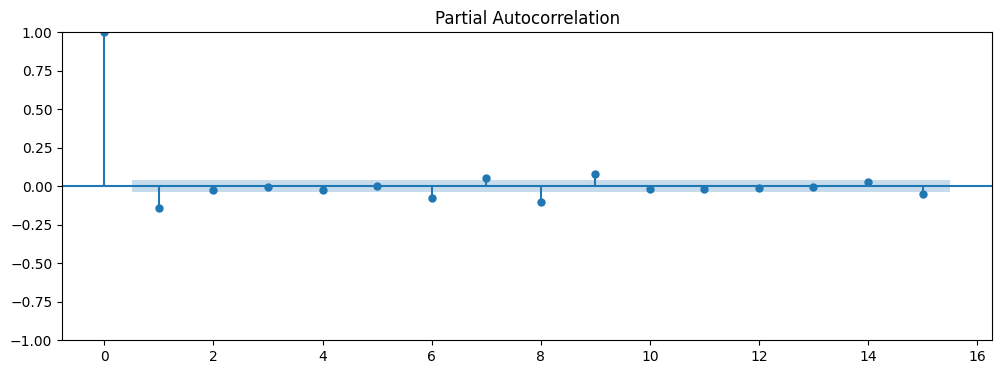

In [235]:
with plt.rc_context():
  plt.rc('figure', figsize = (12,4))
  tsa_plots.plot_acf(data_boxcox_diff, lags = 30)
  tsa_plots.plot_pacf(data_boxcox_diff, lags = 15)
  plt.show()


The LLR test, or Likelihood Ratio Test, is a statistical test that is used to compare the goodness-of-fit of two statistical models. Specifically, it is used to determine whether one model is significantly better at explaining the data than another, nested model. A nested model is a simpler model that can be derived by constraining one or more parameters in the more complex model.

### ARIMA Model

In [236]:
train_data_boxcox_diff = data_boxcox_diff[:2400]
test_data_boxcox_diff = data_boxcox_diff[2400:]

In [237]:
model = ARIMA(train_data_boxcox_diff, order = (5,1,1))
model_fit = model.fit()

In [238]:
y_hat_ar = train_data_boxcox_diff.copy()
y_hat_ar['ar_forecast'] = model_fit.predict(train_data_boxcox_diff.index.min(), train_data_boxcox_diff.index.max())

In [239]:
y_hat_ar['ar_forecast'] = y_hat_ar['ar_forecast'].cumsum()
y_hat_ar['ar_forecast'] = y_hat_ar['ar_forecast'].add(data_boxcox.Close[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast'])

In [240]:
y_hat_ar.Close.shape, y_hat_ar.ar_forecast.shape

((2400,), (2400,))

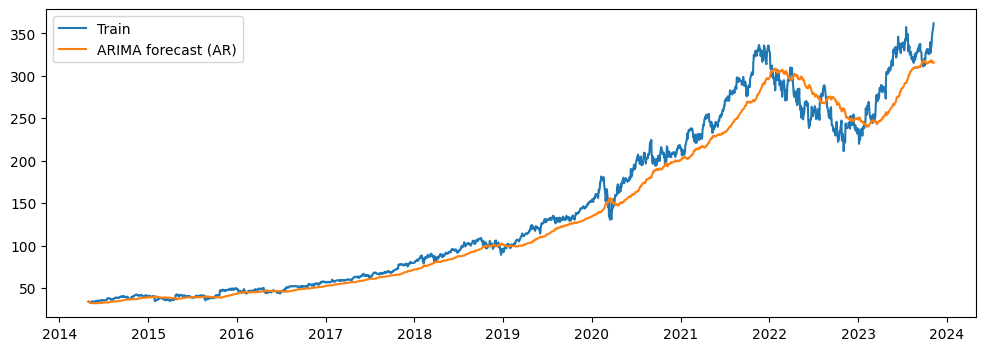

In [241]:
plt.figure(figsize=(12,4))
plt.plot(train_size['Close'], label = 'Train')
plt.plot(y_hat_ar['ar_forecast'][train_size.index.min():], label = 'ARIMA forecast (AR)')
plt.legend(loc = 'best')

ARIMA On Test Data

In [242]:
model = ARIMA(test_data_boxcox_diff, order = (5,1,1))
model_fit = model.fit()

In [243]:
y_hat_test_ar = test_data_boxcox_diff.copy()
y_hat_test_ar['ar_test_forecast'] = model_fit.predict(test_data_boxcox_diff.index.min(), test_data_boxcox_diff.index.max())

In [244]:
y_hat_test_ar['ar_test_forecast'] = y_hat_test_ar['ar_test_forecast'].cumsum()
y_hat_test_ar['ar_test_forecast'] = y_hat_test_ar['ar_test_forecast'].add(data_boxcox.Close-[0])
y_hat_test_ar['ar_test_forecast'] = np.exp(y_hat_test_ar['ar_test_forecast'])

In [245]:
y_hat_test_ar

Close  ar_test_forecast
Date                                  
2023-11-10  0.024592        368.240265
2023-11-13 -0.008121        374.355647
2023-11-14  0.009743        381.302365
2023-11-15  0.000406        385.983071
2023-11-16  0.017430        395.483793
...              ...               ...
2024-04-24  0.003649        523.689531
2024-04-25 -0.024800        507.921723
2024-04-26  0.018079        518.261445
2024-04-29 -0.010067        512.598256
2024-04-30 -0.014864        502.725184

[117 rows x 2 columns]

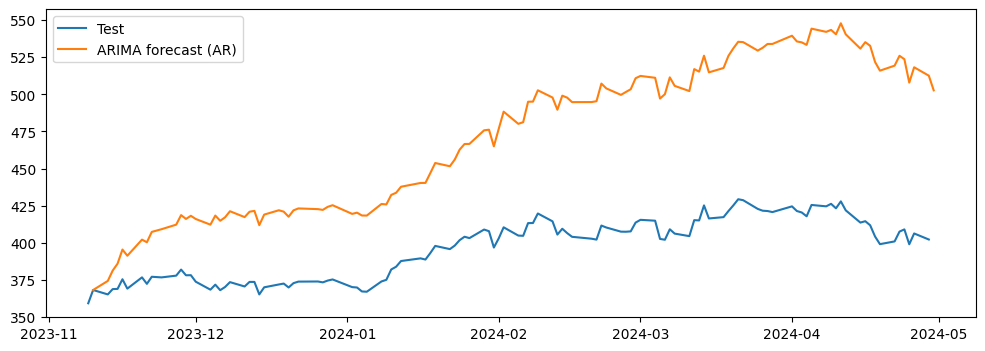

In [246]:
plt.figure(figsize=(12,4))
plt.plot(test_size['Close'], label = 'Test')
plt.plot(y_hat_test_ar['ar_test_forecast'][test_size.index.min():], label = 'ARIMA forecast (AR)')
plt.legend(loc = 'best')

Model Evaluation

In [247]:
arima_rmse = np.sqrt(np.mean((test_size['Close'] - y_hat_test_ar['ar_test_forecast'])**2))
arima_rmse

81.51478353999764

In [248]:
arima_mape = MAPE(test_size['Close'], y_hat_test_ar['ar_test_forecast'])
arima_mape

15.360721269748076

Analysing the residuals

In [249]:
 model_arima_resid = model_fit.resid
 model_arima_resid.mean()

-0.0011946041594943025

Residuals must be stationary.

In [250]:
adf_test(model_arima_resid)

The time series is likely stationary.
ADF test statistic   -1.176160e+01
p-value               1.144489e-21
# lags used           0.000000e+00
# observations        1.160000e+02
dtype: float64


ACF of residuals.

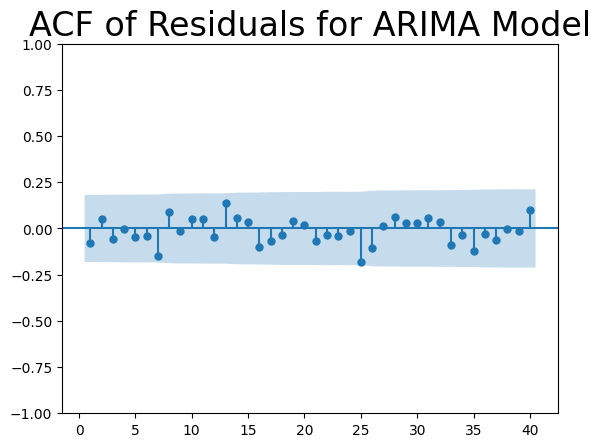

In [251]:
plot_acf(model_arima_resid, zero = False, lags = 40)
plt.title('ACF of Residuals for ARIMA Model', size = 24)
plt.show()

ARIMA Future Forecast.

In [252]:
model_future = ARIMA(data_boxcox_diff, order = (5,0,1))
model_future = model_future.fit()

In [253]:
y_hat_future = data_boxcox_diff.copy()
y_hat_future['ar_future_forecast'] = model_future.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())

In [254]:
y_hat_future['ar_future_forecast'] = y_hat_future['ar_future_forecast'].cumsum()
y_hat_future['ar_future_forecast'] = y_hat_future['ar_future_forecast'].add(data_boxcox.Close[0])
y_hat_future['ar_future_forecast'] = np.exp(y_hat_future['ar_future_forecast'])

In [255]:
y_hat_future

Close  ar_future_forecast
Date                                    
2014-05-01 -0.009950           34.244162
2014-05-02 -0.007780           34.329741
2014-05-05 -0.006572           34.416058
2014-05-06 -0.009428           34.495618
2014-05-07  0.009175           34.597810
...              ...                 ...
2024-04-24  0.003649          390.395674
2024-04-25 -0.024800          390.552969
2024-04-26  0.018079          392.271455
2024-04-29 -0.010067          391.829499
2024-04-30 -0.014864          392.696161

[2517 rows x 2 columns]

In [256]:
test_size.tail()

Close
Date                  
2024-04-23  407.570007
2024-04-24  409.059998
2024-04-25  399.040009
2024-04-26  406.320007
2024-04-29  402.250000

### SARIMAX Model

In [257]:
model = SARIMAX(train_data_boxcox_diff, order=(5,1,1), seasonal_order=(5,1,1,12))
model_fit= model.fit()
y_hat_sarima = train_data_boxcox_diff.copy()

In [258]:
y_hat_sarima['sarima_forecast'] = model_fit.predict(train_data_boxcox_diff.index.min(), train_data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = y_hat_sarima['sarima_forecast'].cumsum()
y_hat_sarima['sarima_forecast'] = y_hat_sarima['sarima_forecast'].add(data_boxcox.Close[0])
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast'])
y_hat_sarima

Close  sarima_forecast
Date                                 
2014-05-01 -0.009950        34.210911
2014-05-02 -0.007780        33.872192
2014-05-05 -0.006572        33.609680
2014-05-06 -0.009428        33.389515
2014-05-07  0.009175        33.076199
...              ...              ...
2023-11-03  0.012780       392.974434
2023-11-06  0.010517       390.016322
2023-11-07  0.011157       388.898064
2023-11-08  0.007378       389.335383
2023-11-09 -0.006935       388.899076

[2400 rows x 2 columns]

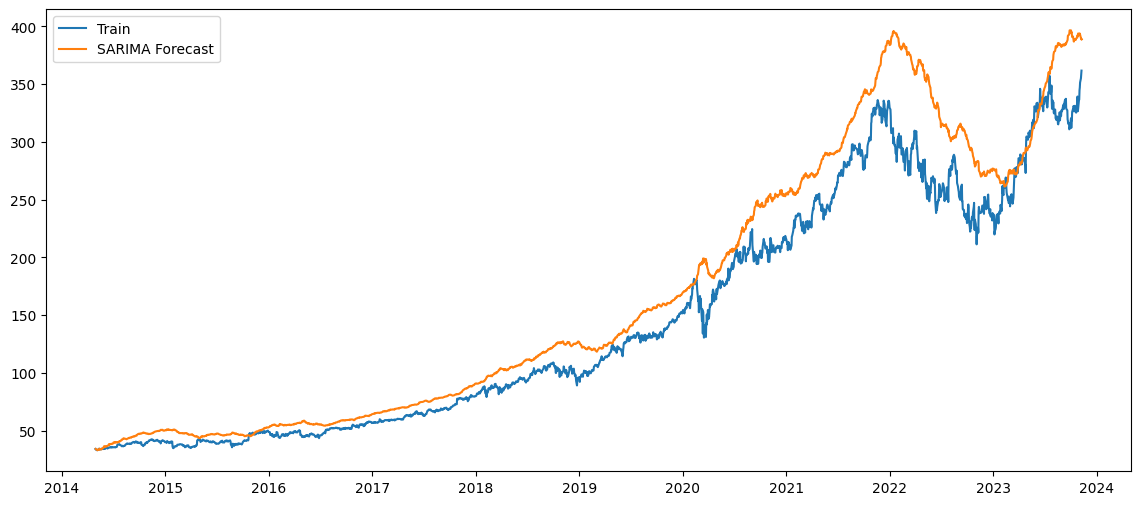

In [259]:
plt.figure(figsize=(14,6))
plt.plot(train_size, label='Train')
plt.plot(y_hat_sarima['sarima_forecast'][train_size.index.min():], label='SARIMA Forecast')
plt.legend(loc='best')
plt.show()

In [260]:
model_test_sarimax = SARIMAX(test_data_boxcox_diff, order=(5,1,1), seasonal_order = (5,1,1,12))
model_test_sarimax = model_test_sarimax.fit()
y_hat_test_sarimax = test_data_boxcox_diff.copy()

In [261]:
y_hat_test_sarimax['sarima_test'] = model_test_sarimax.predict(test_data_boxcox_diff.index.min(), test_data_boxcox_diff.index.max())
y_hat_test_sarimax['sarima_test'] = y_hat_test_sarimax['sarima_test'].cumsum()
y_hat_test_sarimax['sarima_test'] = y_hat_test_sarimax['sarima_test'].add(data_boxcox.Close-[0])
y_hat_test_sarimax['sarima_test_forecast'] = np.exp(y_hat_test_sarimax['sarima_test'])
y_hat_test_sarimax.tail()

Close  sarima_test  sarima_test_forecast
Date                                                   
2024-04-24  0.003649     6.027992            414.880980
2024-04-25 -0.024800     5.992643            400.471496
2024-04-26  0.018079     6.006366            406.005043
2024-04-29 -0.010067     5.990135            399.468640
2024-04-30 -0.014864     5.964756            389.458053

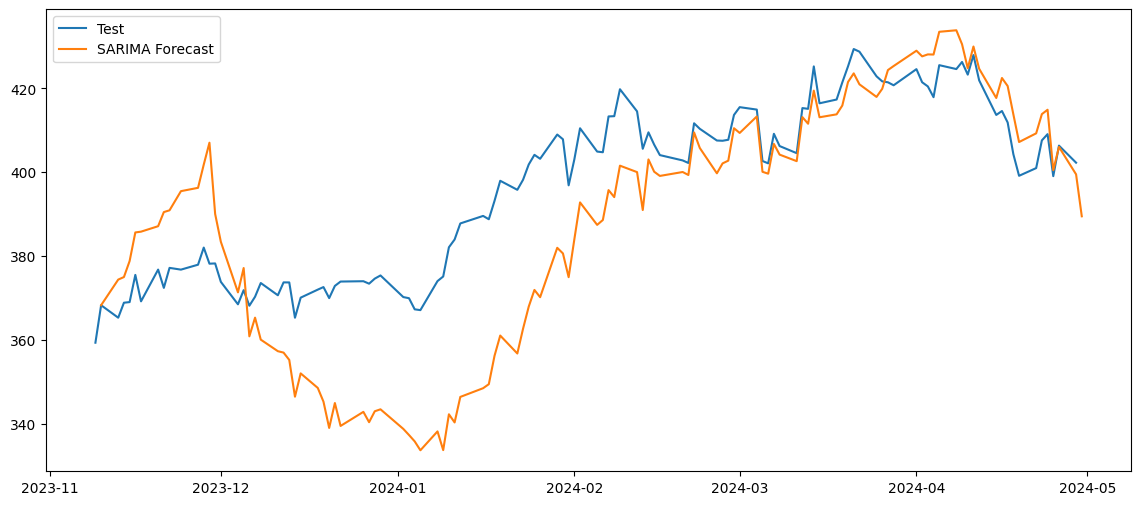

In [262]:
plt.figure(figsize = (14,6))
plt.plot(test_size, label = 'Test')
plt.plot(y_hat_test_sarimax['sarima_test_forecast'][test_size.index.min():], label = 'SARIMA Forecast')
plt.legend(loc = 'best')
plt.show()

Model Evaluation Sarimax.

In [263]:
sarima_rmse = np.sqrt(np.mean((test_size['Close'] - y_hat_test_sarimax['sarima_test_forecast'])**2))
sarima_rmse

19.469302081547042

In [264]:
sarima_mape = MAPE(test_size['Close'], y_hat_test_sarimax['sarima_test_forecast'])
sarima_mape

4.06752036521562

Analysis of Residuals.

In [265]:
model_sarima = model_test_sarimax.resid
model_sarima.mean()

0.0009873403179003703

Residuals must be stationary.

In [266]:
adf_test(model_sarima)

The time series is likely stationary.
ADF test statistic   -1.384472e+01
p-value               7.184766e-26
# lags used           0.000000e+00
# observations        1.160000e+02
dtype: float64


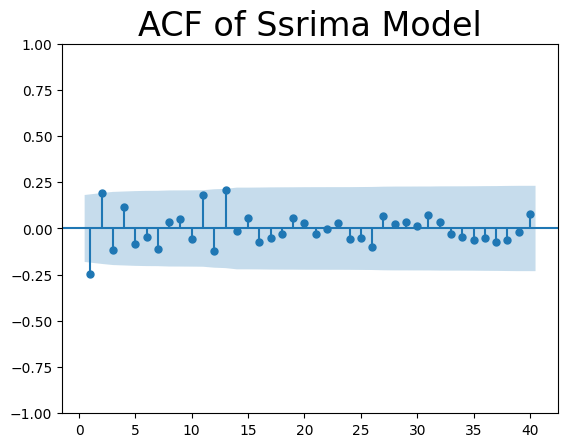

In [267]:
plot_acf(model_sarima, zero = False, lags = 40)
plt.title('ACF of Ssrima Model', size = 24)
plt.show()

### LSTM Model

In [268]:
data_lstm = pd.DataFrame(data_model['Close'])
data_lstm

Close
Date                  
2014-04-30   34.210911
2014-05-01   33.872192
2014-05-02   33.609680
2014-05-05   33.389515
2014-05-06   33.076199
...                ...
2024-04-24  409.059998
2024-04-25  399.040009
2024-04-26  406.320007
2024-04-29  402.250000
2024-04-30  396.315002

[2518 rows x 1 columns]

### Normalizing the Data

Normalizing / scaling close value between 0 to 1


*  Normalizing or scaling the close values of a stock (or any numerical data) between 0 and 1 is a common preprocessing step in machine learning, especially for models sensitive to the scale of input features.
*   We can achieve this using a technique called Min-Max scaling.

In [269]:
scaler = MinMaxScaler(feature_range = (0,1))
scaler_df = pd.DataFrame(scaler.fit_transform(data_lstm).reshape(-1,1))
print(scaler_df.shape)

(2518, 1)


In [270]:
train_lstm = scaler_df.iloc[:2400]
test_lstm = scaler_df.iloc[2400:]

In [271]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for item in range(len(dataset) - time_step - 1):
        a = dataset.iloc[item:(item + time_step)]
        dataX.append(a)
        # Access the element directly using iloc
        dataY.append(dataset.iloc[item + time_step])
    return numpy.array(dataX), numpy.array(dataY)

In [272]:
time_step = 1
X_train, Y_train = create_dataset(train_lstm, time_step)
X_test, Y_test = create_dataset(test_lstm, time_step)

In [273]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

print('X_train:',X_train.shape)
print('X_test:',X_test.shape)

X_train: (2398, 1, 1)
X_test: (116, 1, 1)


In [274]:
tf.keras.backend.clear_session()
model = Sequential()
model.add(LSTM(32, return_sequences = True, input_shape = (time_step,1)))
model.add(LSTM(32, return_sequences = True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [275]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 32)             4352      
                                                                 
 lstm_1 (LSTM)               (None, 1, 32)             8320      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 21025 (82.13 KB)
Trainable params: 21025 (82.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


This model is designed for sequential data processing, which is common in time series analysis.
It has a relatively moderate number of units in the LSTM layers (32 units each), which can capture complex temporal patterns.
The model uses mean squared error as the loss function, indicating it is likely used for regression tasks.
The Adam optimizer is employed for gradient descent during training, which is a popular choice for deep learning models.
The total number of trainable parameters (21025) indicates a moderately complex model that could be suitable for a variety of time series prediction tasks.

In [276]:
model.fit(X_train,Y_train,validation_data = (X_test,Y_test),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
75/75 [==============================] - 8s 22ms/step - loss: 0.0840 - val_loss: 0.1741
Epoch 2/100
75/75 [==============================] - 0s 5ms/step - loss: 0.0173 - val_loss: 0.0167
Epoch 3/100
75/75 [==============================] - 1s 7ms/step - loss: 8.9347e-04 - val_loss: 0.0158
Epoch 4/100
75/75 [==============================] - 1s 7ms/step - loss: 6.8258e-04 - val_loss: 0.0149
Epoch 5/100
75/75 [==============================] - 1s 7ms/step - loss: 5.0599e-04 - val_loss: 0.0080
Epoch 6/100
75/75 [==============================] - 1s 9ms/step - loss: 3.6454e-04 - val_loss: 0.0034
Epoch 7/100
75/75 [==============================] - 1s 8ms/step - loss: 2.5924e-04 - val_loss: 0.0020
Epoch 8/100
75/75 [==============================] - 0s 5ms/step - loss: 1.7952e-04 - val_loss: 5.8042e-04
Epoch 9/100
75/75 [==============================] - 0s 5ms/step - loss: 1.2827e-04 - val_loss: 3.1351e-04
Epoch 10/100
75/75 [==============================] - 0s 5ms/step - loss

In [277]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict.shape, test_predict.shape

4/4 [==============================] - 0s 4ms/step


((2398, 1), (116, 1))

In [278]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(Y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(Y_test.reshape(-1,1))

In [279]:
print('Train_data_RMSE:',math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print('Train_data_MSE:',mean_squared_error(original_ytrain,train_predict))
print('Train_data_MAE:',mean_absolute_error(original_ytrain,train_predict))
print('Test_data_RMSE:',math.sqrt(mean_squared_error(original_ytest,test_predict)))
print('Test_data_MSE:',mean_squared_error(original_ytest,test_predict))
print('Test_data_MAE:',mean_absolute_error(original_ytest,test_predict))

Train_data_RMSE: 3.293530810750466
Train_data_MSE: 10.847345201362621
Train_data_MAE: 2.2089449219946267
Test_data_RMSE: 10.061168018648864
Test_data_MSE: 101.22710189948272
Test_data_MAE: 8.874026857573408


In [280]:
rmse_lstm = math.sqrt(mean_squared_error(original_ytest,test_predict))
rmse_lstm

10.061168018648864

In [281]:
print('Train data explained variance regression score:', explained_variance_score(original_ytrain, train_predict))
print('Test data explained variance regression score:', explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9989216983230985
Test data explained variance regression score: 0.9386875567774956


Plotting the data.

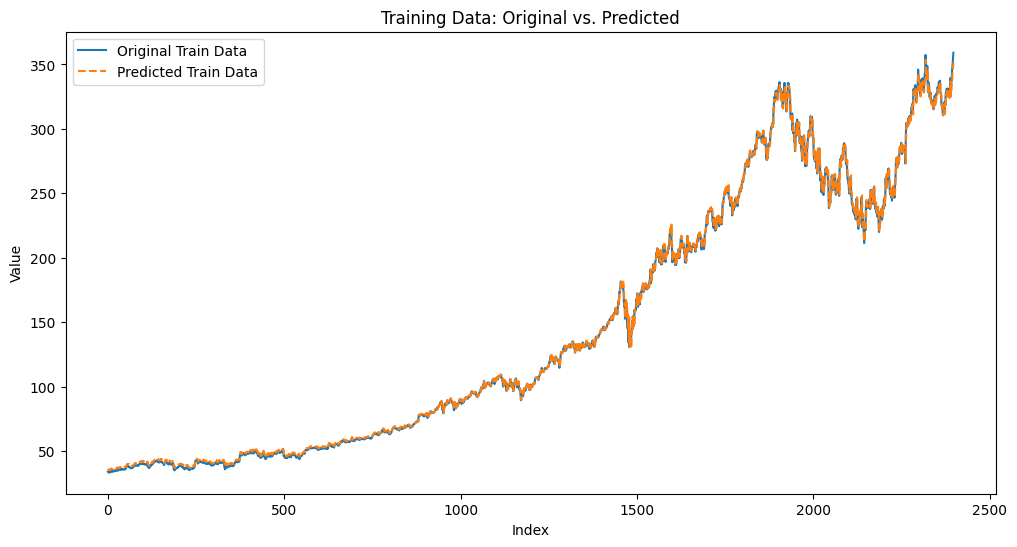

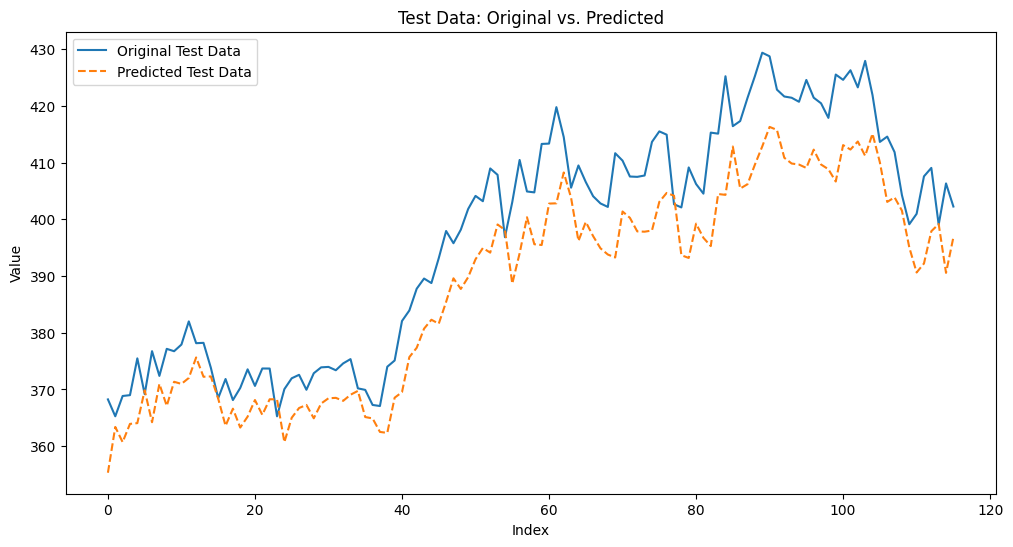

In [282]:
# Plot for training data
plt.figure(figsize=(12, 6))
plt.plot(original_ytrain, label='Original Train Data')
plt.plot(train_predict, label='Predicted Train Data', linestyle='dashed')
plt.title('Training Data: Original vs. Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

# Plot for test data
plt.figure(figsize=(12, 6))
plt.plot(original_ytest, label='Original Test Data')
plt.plot(test_predict, label='Predicted Test Data', linestyle='dashed')
plt.title('Test Data: Original vs. Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

Forecasting the next 30 days.

1/1 [==============================] - 0s 20ms/step


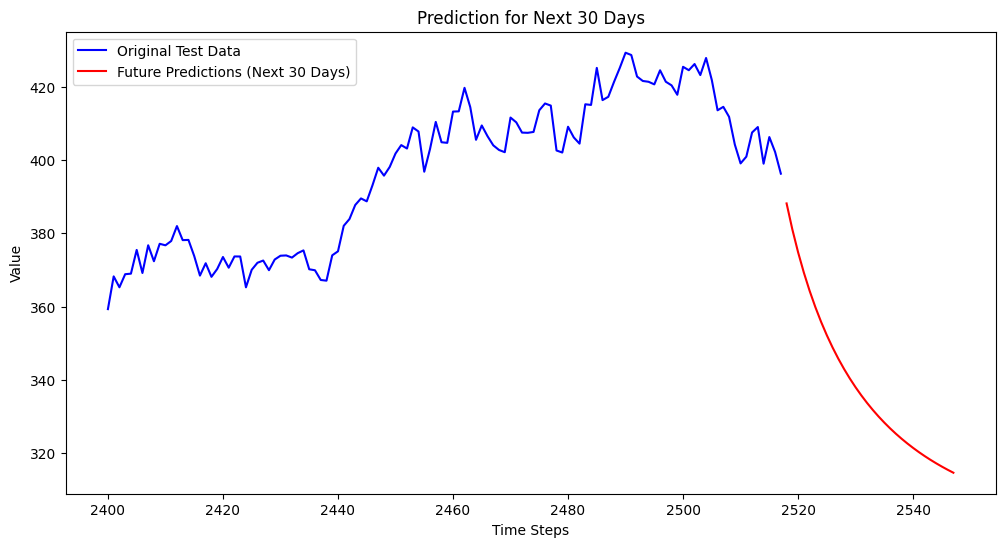

In [283]:
# Define parameters
time_step = 1
num_days_to_predict = 30

# Initialize an array to hold the future predictions
future_predictions = []

# Start with the last available data point from your test data
last_known_data = test_lstm.iloc[-time_step:].values

# Forecast future periods
for item in range(num_days_to_predict):
    # Reshape the input data (last_known_data) to match the expected input shape of the model
    input_data = last_known_data.reshape(1, time_step, 1)

    # Predict the next data point using the model
    future_prediction = model.predict(input_data)

    # Append the prediction to the list of future predictions
    future_predictions.append(future_prediction)

    # Append the new prediction to last_known_data and shift the data by removing the first element
    last_known_data = np.append(last_known_data[1:], future_prediction).reshape(-1, 1)

# Convert future predictions to a NumPy array
future_predictions = np.array(future_predictions).reshape(-1, 1)

# Inverse transform future predictions
future_predictions = scaler.inverse_transform(future_predictions)

# Plotting
plt.figure(figsize=(12, 6))

# Plot the original test data for context
test_data_range = np.arange(len(train_lstm), len(train_lstm) + len(test_lstm))
plt.plot(test_data_range, scaler.inverse_transform(test_lstm.values).flatten(), label='Original Test Data', color='blue')

# Plot future predictions for the next 30 days
next_30_days_range = np.arange(len(train_lstm) + len(test_lstm), len(train_lstm) + len(test_lstm) + num_days_to_predict)
plt.plot(next_30_days_range, future_predictions, label='Future Predictions (Next 30 Days)', color='red')

# Add labels, title, and legend
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('Prediction for Next 30 Days')
plt.legend()
plt.show()

### FB Prophet Model

Facebook Prophet is an open-source time series forecasting tool developed by Facebook's Core Data Science team. It is designed to be both flexible and user-friendly, making it a popular choice for data scientists and analysts who need to perform time series forecasting.


*    Prophet supports both additive and multiplicative seasonality. Users can specify the type of seasonality based on their data characteristics.
* Prophet includes built-in visualization functions for plotting the forecast and its components (trend, seasonality)



In [284]:
fb_prophet_model = data_model.Close
fb_prophet_model = fb_prophet_model.reset_index()
fb_prophet_model.columns = ['ds', 'y']

In [285]:
fb_prophet_model.head()

ds          y
0 2014-04-30  34.210911
1 2014-05-01  33.872192
2 2014-05-02  33.609680
3 2014-05-05  33.389515
4 2014-05-06  33.076199

In [286]:
train_prophet = fb_prophet_model.iloc[:int(len(fb_prophet_model)*0.8)]
test_prophet = fb_prophet_model.iloc[int(len(fb_prophet_model)*0.8):]

In [287]:
print(train_prophet.shape)
print(test_prophet.shape)

(2014, 2)
(504, 2)


In [288]:
model = Prophet()
model.fit(train_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvg1w1dtm/vn43e0ly.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvg1w1dtm/79no4cop.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36363', 'data', 'file=/tmp/tmpvg1w1dtm/vn43e0ly.json', 'init=/tmp/tmpvg1w1dtm/79no4cop.json', 'output', 'file=/tmp/tmpvg1w1dtm/prophet_modelgcmskzz9/prophet_model-20240430163751.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:37:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:37:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [289]:
forecast = model.predict()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

ds        yhat  yhat_lower  yhat_upper
0    2014-04-30   31.558317   19.953508   42.220803
1    2014-05-01   31.799414   20.708710   42.893577
2    2014-05-02   32.126756   20.305025   43.099847
3    2014-05-05   32.528158   21.364769   43.139754
4    2014-05-06   32.687048   21.565492   43.359109
...         ...         ...         ...         ...
2009 2022-04-21  318.622601  307.866322  329.514021
2010 2022-04-22  319.110703  308.130135  330.211243
2011 2022-04-25  320.160234  308.080405  331.973983
2012 2022-04-26  320.591544  310.001002  331.979702
2013 2022-04-27  321.172282  310.171179  332.232708

[2014 rows x 4 columns]

In [290]:
forecast['yhat'].count()

2014

Prophet Forecast

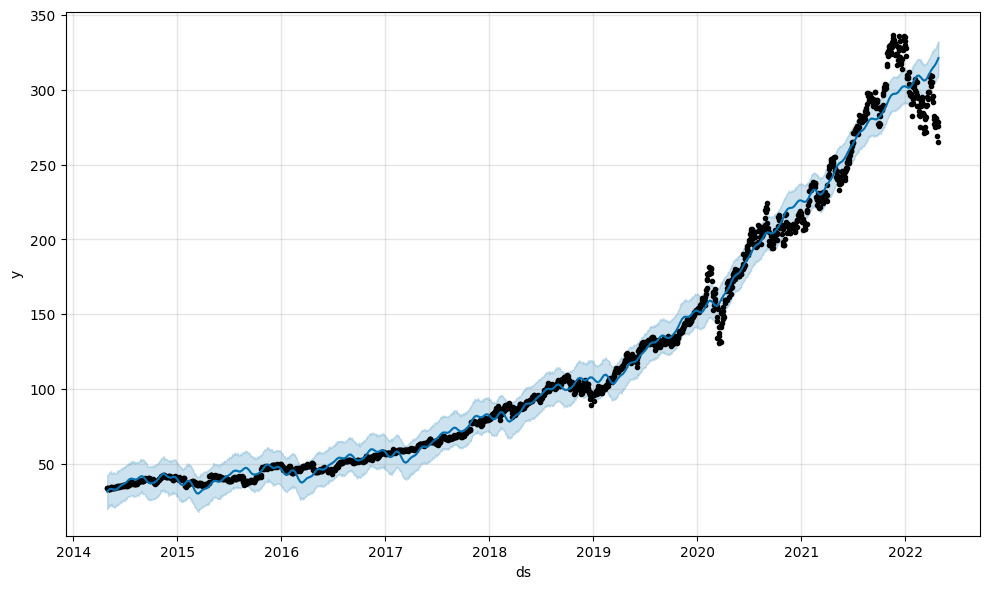

In [291]:
fig = model.plot(forecast)

In [292]:
plot_plotly(model, forecast)

Forecasting on the unknown periods

In [293]:
model2 = Prophet()
model2.fit(fb_prophet_model)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvg1w1dtm/ptnpa5ex.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvg1w1dtm/vyyd474d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90706', 'data', 'file=/tmp/tmpvg1w1dtm/ptnpa5ex.json', 'init=/tmp/tmpvg1w1dtm/vyyd474d.json', 'output', 'file=/tmp/tmpvg1w1dtm/prophet_model_zvd2gtf/prophet_model-20240430163754.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:37:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:37:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [294]:
future_unknown = model2.make_future_dataframe(periods = 36, freq = 'MS')

In [295]:
forecast_unknown = model2.predict(future_unknown)
forecast_unknown[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

ds        yhat  yhat_lower  yhat_upper
0    2014-04-30   37.549383   21.288069   55.858078
1    2014-05-01   37.481241   19.285062   54.580716
2    2014-05-02   37.412756   19.254775   55.199231
3    2014-05-05   36.824941   17.930731   54.577857
4    2014-05-06   36.628377   18.930679   54.198488
...         ...         ...         ...         ...
2549 2026-12-01  609.705460  362.693963  866.520611
2550 2027-01-01  612.466612  354.682561  887.476446
2551 2027-02-01  624.917214  356.001269  917.428847
2552 2027-03-01  628.466360  347.082701  925.239193
2553 2027-04-01  641.942813  353.354980  955.561732

[2554 rows x 4 columns]

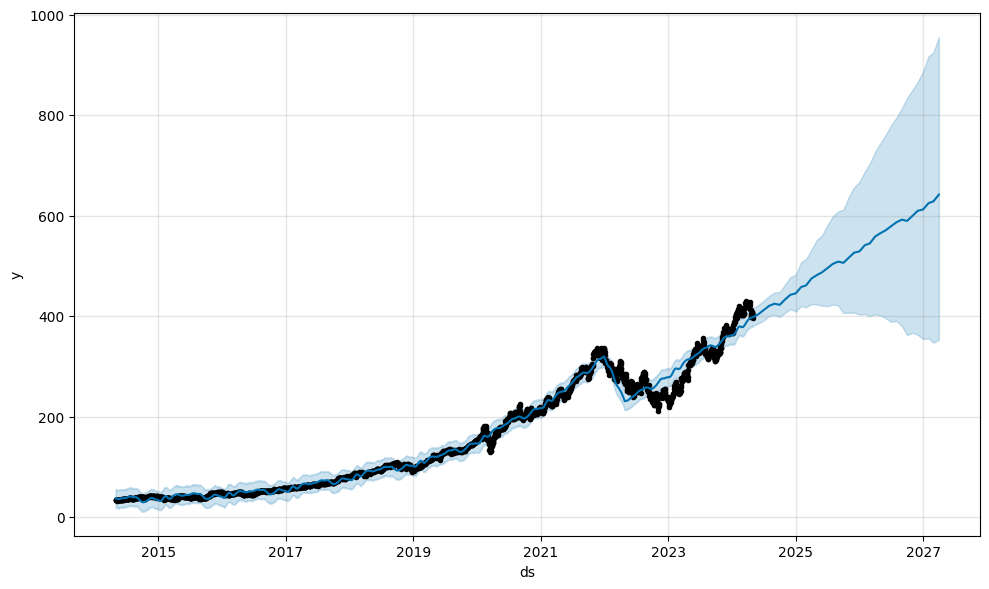

In [296]:
fig = model2.plot(forecast_unknown)

In [297]:
plot_plotly(model2, forecast_unknown)

Model Evaluation of FB Prophet

In [298]:
fb_rmse = np.sqrt(mean_squared_error(train_prophet['y'], forecast['yhat']))
fb_mape = MAPE(train_prophet['y'], forecast['yhat'])

In [299]:
print(fb_rmse)
print(fb_mape)

8.635425302297612
5.21615130433059


In [300]:
print('Fb_prophet Rmse','\n',\
      'Mean Absolute Percentage = {}'.format(fb_mape),'\n',\
      'Root Mean Squared Error = {}'.format(fb_rmse))

Fb_prophet Rmse 
 Mean Absolute Percentage = 5.21615130433059 
 Root Mean Squared Error = 8.635425302297612


### Comparing the results

In [301]:
Evaluation = {'Models':pd.Series(['rmse_linear','rmse_exponential','rmse_quad','rmse_add','rmse_add','rmse_'])}

In [302]:
data = {'Models':pd.Series(['rmse_linear','rmse_exponential','rmse_quad','rmse_add','rmse_add_sea','rmse_mul','arima_rmse','sarima_rmse','Lstm_rmse','Fb prophet rmse']),'Rmse_Values':pd.Series([rmse_linear,rmse_exponential,rmse_quad,rmse_add,rmse_add_sea,rmse_mul,arima_rmse,sarima_rmse,rmse_lstm ,fb_rmse])}
table_rmse = pd.DataFrame(data)
table_rmse.sort_values(['Rmse_Values'], inplace = True, ignore_index = True)
table_rmse

Models  Rmse_Values
0   Fb prophet rmse     8.635425
1         Lstm_rmse    10.061168
2       sarima_rmse    19.469302
3         rmse_quad    29.986238
4       rmse_linear    72.952676
5        arima_rmse    81.514784
6          rmse_add   240.032225
7      rmse_add_sea   240.032225
8          rmse_mul   270.175621
9  rmse_exponential   372.315521

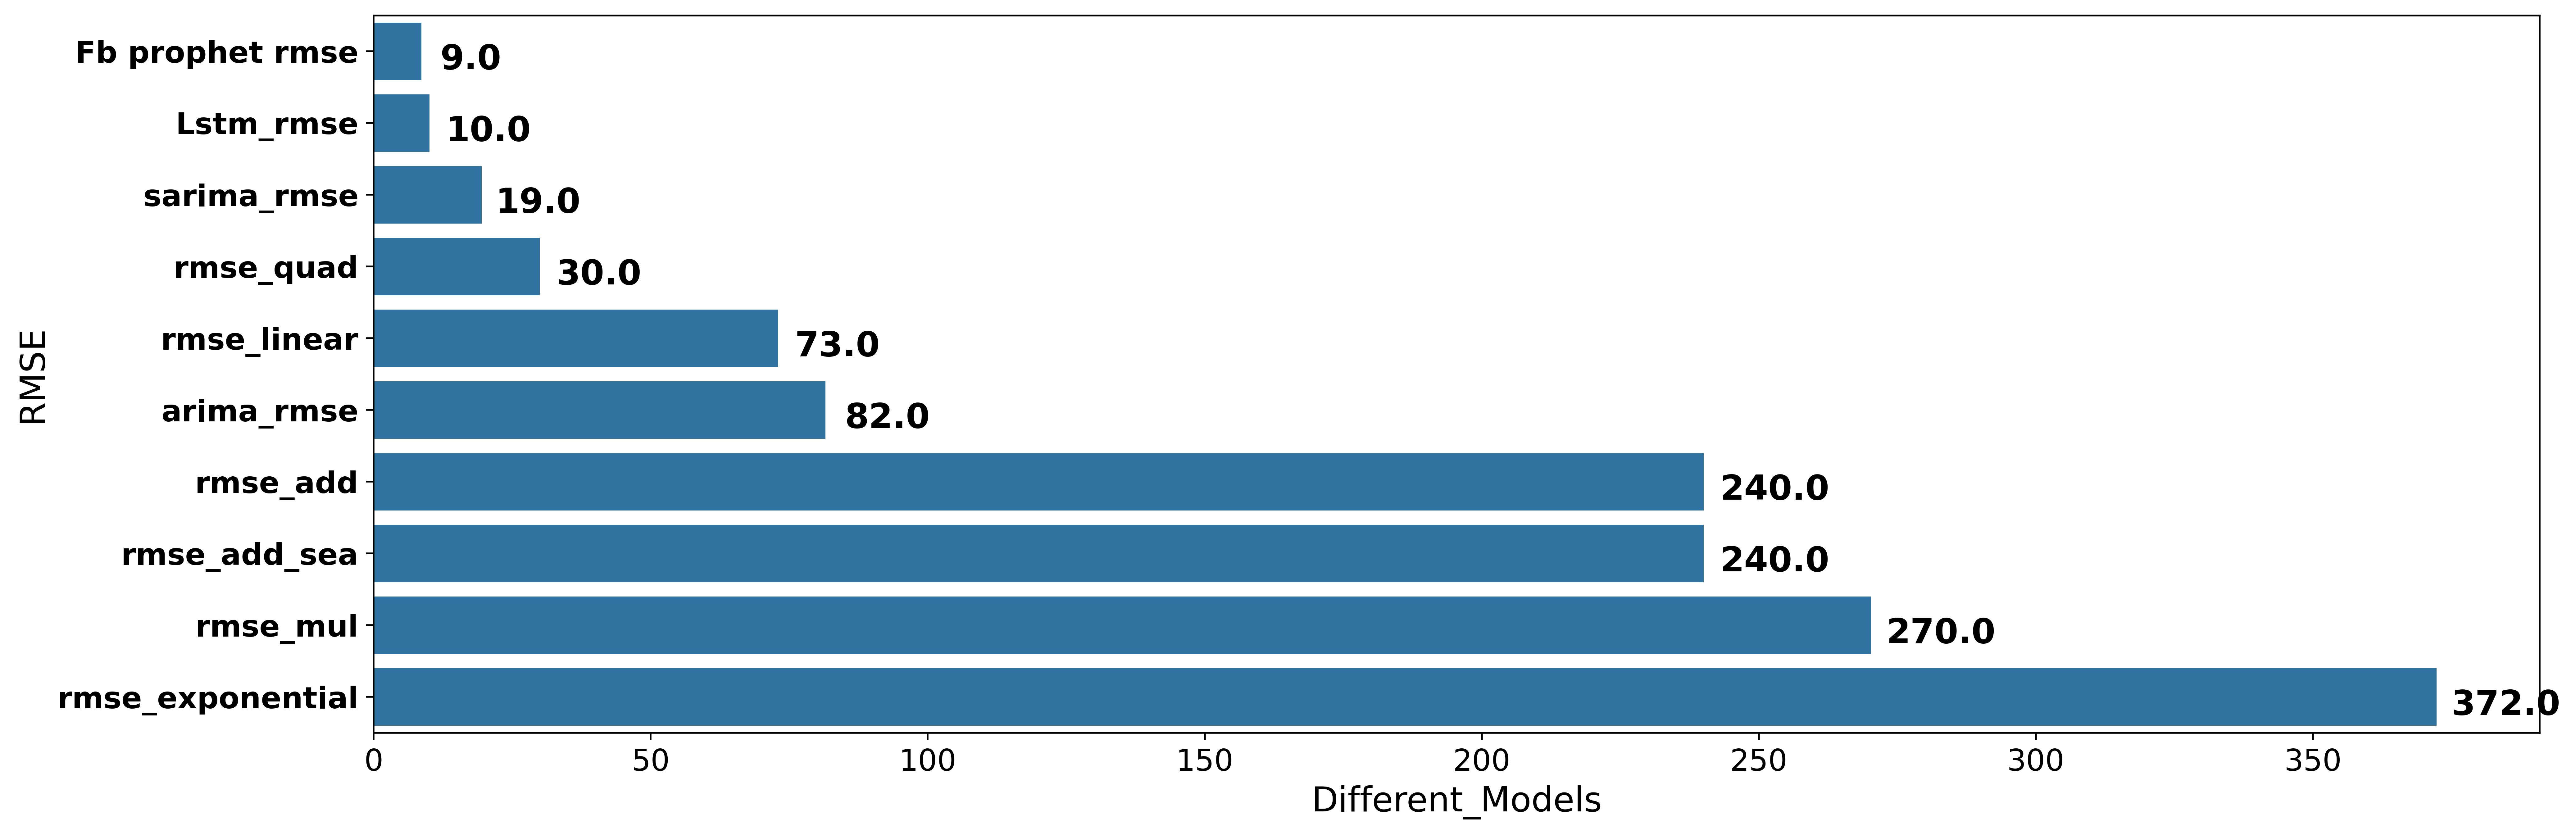

In [303]:
f, axe = plt.subplots(1,1, figsize=(18,6), dpi = 500)
sns.barplot(x = 'Rmse_Values', y = 'Models', data = table_rmse, ax = axe)
axe.set_xlabel('Different_Models', size = 16)
axe.set_ylabel('RMSE', size = 16)
plt.yticks(fontsize = 14, fontweight = 'bold') # Changed 'frontsize' to 'fontsize'
plt.xticks(fontsize = 14)

for i, v in enumerate(np.round(table_rmse.Rmse_Values.values,0)):
    axe.text(v + 3, i + .25, str(v),
            color = 'black', fontweight = 'bold', fontsize = 16)

plt.show()